In [1]:
import torch

In [2]:
import torchvision

In [4]:
# Install required packages if not already installed
!pip install torch torchvision torchsummary pillow matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [7]:
# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

In [8]:
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.exists(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.images.append(os.path.join(class_dir, img_name))
                        self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Create datasets
train_dataset = MetalDefectDataset('metal_data/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset('metal_data/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset('metal_data/test', transform=data_transforms['test'])

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Training samples: 0
Validation samples: 0
Test samples: 0


In [9]:
# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Visualize some training samples
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:8])
imshow(out, title=[class_names[x] for x in classes[:8]])
plt.show()

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Check if data directory exists
def check_data_structure(base_path='metal_data'):
    print("Checking data structure...")
    
    if not os.path.exists(base_path):
        print(f"❌ Error: Directory '{base_path}' not found!")
        return False
    
    expected_folders = ['train', 'test', 'valid']
    expected_classes = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
    
    for folder in expected_folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            print(f"❌ Error: Folder '{folder_path}' not found!")
            return False
        
        print(f"\n📁 Checking {folder}:")
        for class_name in expected_classes:
            class_path = os.path.join(folder_path, class_name)
            if os.path.exists(class_path):
                num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                print(f"  ✅ {class_name}: {num_images} images")
            else:
                print(f"  ❌ {class_name}: folder not found")
    
    return True

# Run the check
data_exists = check_data_structure()
if not data_exists:
    print("\nPlease make sure your data is organized as follows:")
    print("metal_data/")
    print("├── train/")
    print("│   ├── Crazing/")
    print("│   ├── Inclusion/")
    print("│   ├── Patches/")
    print("│   ├── Pitted/")
    print("│   ├── Rolled/")
    print("│   └── Scratches/")
    print("├── test/")
    print("│   └── ... (same structure as train)")
    print("└── valid/")
    print("    └── ... (same structure as train)")

Checking data structure...

📁 Checking train:
  ✅ Crazing: 0 images
  ✅ Inclusion: 0 images
  ✅ Patches: 0 images
  ✅ Pitted: 0 images
  ✅ Rolled: 0 images
  ✅ Scratches: 0 images

📁 Checking test:
  ✅ Crazing: 0 images
  ✅ Inclusion: 0 images
  ✅ Patches: 0 images
  ✅ Pitted: 0 images
  ✅ Rolled: 0 images
  ✅ Scratches: 0 images

📁 Checking valid:
  ✅ Crazing: 0 images
  ✅ Inclusion: 0 images
  ✅ Patches: 0 images
  ✅ Pitted: 0 images
  ✅ Rolled: 0 images
  ✅ Scratches: 0 images


In [11]:
import os
import requests
import zipfile
import tarfile
from tqdm import tqdm
import urllib.request

def download_neu_metal_dataset():
    """Download and extract the NEU Metal Surface Defects Dataset"""
    
    # Create directory structure
    splits = ['train', 'test', 'valid']
    classes = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
    
    for split in splits:
        for class_name in classes:
            os.makedirs(f'metal_data/{split}/{class_name}', exist_ok=True)
    
    print("📥 Downloading NEU Metal Surface Defects Dataset...")
    
    # Download the dataset (this is a common metal defects dataset)
    # Note: You may need to adjust the URL based on the actual dataset location
    urls = [
        "https://github.com/zhangyongshun/Metal-Surface-Defect-Datasets/raw/main/NEU-DET.zip",
        "https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data"
    ]
    
    try:
        # Method 1: Download from alternative source
        print("Downloading dataset... This may take a few minutes.")
        
        # Since direct download might be tricky, let's create a function to manually download
        print("\n🔧 Manual download required:")
        print("1. Go to: https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data")
        print("2. Download the dataset (you'll need a Kaggle account)")
        print("3. Extract the files to 'metal_data' folder")
        print("\nOr use the sample data creation method below...")
        
        return False
        
    except Exception as e:
        print(f"Download failed: {e}")
        return False

# Uncomment to try downloading
# download_neu_metal_dataset()

ModuleNotFoundError: No module named 'tqdm'

In [12]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
import random

def create_synthetic_metal_defects():
    """Create synthetic metal defect images for testing"""
    
    print("🎨 Creating synthetic metal defect images...")
    
    splits = ['train', 'test', 'valid']
    classes = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
    
    # Number of samples per class for each split
    samples_config = {
        'train': 50,    # 50 training samples per class
        'test': 15,     # 15 test samples per class  
        'valid': 15     # 15 validation samples per class
    }
    
    for split in splits:
        print(f"\nCreating {split} data...")
        
        for class_idx, class_name in enumerate(classes):
            class_dir = f'metal_data/{split}/{class_name}'
            os.makedirs(class_dir, exist_ok=True)
            
            num_samples = samples_config[split]
            
            for i in range(num_samples):
                # Create base metal texture
                img = create_metal_texture()
                
                # Add specific defect based on class
                if class_name == 'Crazing':
                    img = add_crazing_defect(img)
                elif class_name == 'Inclusion':
                    img = add_inclusion_defect(img)
                elif class_name == 'Patches':
                    img = add_patches_defect(img)
                elif class_name == 'Pitted':
                    img = add_pitted_defect(img)
                elif class_name == 'Rolled':
                    img = add_rolled_defect(img)
                elif class_name == 'Scratches':
                    img = add_scratches_defect(img)
                
                # Save image
                img_path = os.path.join(class_dir, f'{class_name}_{i+1:03d}.jpg')
                img.save(img_path)
            
            print(f"✅ Created {num_samples} {class_name} images for {split}")
    
    print(f"\n🎉 Successfully created synthetic dataset!")
    print(f"📊 Total images created: {sum(samples_config.values()) * len(classes)}")

def create_metal_texture():
    """Create a base metal-like texture"""
    width, height = 224, 224
    
    # Create metallic background
    base_color = random.randint(100, 150)  # Gray metallic color
    img = Image.new('RGB', (width, height), color=(base_color, base_color, base_color))
    
    # Add noise for texture
    pixels = img.load()
    for i in range(width):
        for j in range(height):
            noise = random.randint(-10, 10)
            r = min(255, max(0, base_color + noise))
            g = min(255, max(0, base_color + noise))
            b = min(255, max(0, base_color + noise))
            pixels[i, j] = (r, g, b)
    
    return img

def add_crazing_defect(img):
    """Add crazing (crack-like) defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add multiple thin lines resembling cracks
    for _ in range(random.randint(5, 15)):
        x1 = random.randint(0, width)
        y1 = random.randint(0, height)
        x2 = x1 + random.randint(-50, 50)
        y2 = y1 + random.randint(-50, 50)
        
        # Draw thin white/gray lines
        color = (200, 200, 200)
        draw.line([(x1, y1), (x2, y2)], fill=color, width=1)
    
    return img

def add_inclusion_defect(img):
    """Add inclusion (foreign material) defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add small irregular shapes
    for _ in range(random.randint(3, 8)):
        x = random.randint(20, width-20)
        y = random.randint(20, height-20)
        size = random.randint(5, 15)
        
        # Different colors for inclusions
        colors = [(255, 100, 100), (100, 255, 100), (100, 100, 255)]
        color = random.choice(colors)
        
        # Draw irregular shape
        points = []
        for i in range(6):
            angle = 2 * 3.14159 * i / 6
            px = x + size * 0.7 * np.cos(angle) + random.randint(-2, 2)
            py = y + size * 0.7 * np.sin(angle) + random.randint(-2, 2)
            points.append((px, py))
        
        draw.polygon(points, fill=color)
    
    return img

def add_patches_defect(img):
    """Add patch-like defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add irregular patches
    for _ in range(random.randint(2, 6)):
        x = random.randint(30, width-30)
        y = random.randint(30, height-30)
        w = random.randint(20, 40)
        h = random.randint(20, 40)
        
        # Different shade for patches
        patch_color = random.randint(50, 100)
        color = (patch_color, patch_color, patch_color)
        
        # Draw irregular rectangle
        draw.rectangle([x, y, x+w, y+h], fill=color, outline=None)
    
    return img

def add_pitted_defect(img):
    """Add pitted surface defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add small circular pits
    for _ in range(random.randint(10, 25)):
        x = random.randint(10, width-10)
        y = random.randint(10, height-10)
        radius = random.randint(2, 8)
        
        # Dark circles for pits
        draw.ellipse([x-radius, y-radius, x+radius, y+radius], 
                    fill=(50, 50, 50), outline=None)
    
    return img

def add_rolled_defect(img):
    """Add rolled metal pattern"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add parallel lines resembling rolling marks
    spacing = random.randint(15, 25)
    for x in range(0, width, spacing):
        y1 = random.randint(0, height)
        y2 = y1 + random.randint(-20, 20)
        
        color = (150, 150, 150)
        draw.line([(x, 0), (x, height)], fill=color, width=1)
    
    return img

def add_scratches_defect(img):
    """Add scratch defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    # Add long straight scratches
    for _ in range(random.randint(3, 8)):
        if random.random() > 0.5:
            # Horizontal scratch
            y = random.randint(10, height-10)
            draw.line([(0, y), (width, y)], fill=(200, 200, 200), width=2)
        else:
            # Vertical scratch
            x = random.randint(10, width-10)
            draw.line([(x, 0), (x, height)], fill=(200, 200, 200), width=2)
    
    return img

# Create the synthetic dataset
create_synthetic_metal_defects()

🎨 Creating synthetic metal defect images...

Creating train data...
✅ Created 50 Crazing images for train
✅ Created 50 Inclusion images for train
✅ Created 50 Patches images for train
✅ Created 50 Pitted images for train
✅ Created 50 Rolled images for train
✅ Created 50 Scratches images for train

Creating test data...
✅ Created 15 Crazing images for test
✅ Created 15 Inclusion images for test
✅ Created 15 Patches images for test
✅ Created 15 Pitted images for test
✅ Created 15 Rolled images for test
✅ Created 15 Scratches images for test

Creating valid data...
✅ Created 15 Crazing images for valid
✅ Created 15 Inclusion images for valid
✅ Created 15 Patches images for valid
✅ Created 15 Pitted images for valid
✅ Created 15 Rolled images for valid
✅ Created 15 Scratches images for valid

🎉 Successfully created synthetic dataset!
📊 Total images created: 480


In [13]:
# Now let's verify the data structure
def verify_and_load_data():
    """Verify the data and create datasets"""
    
    print("🔍 Verifying data structure...")
    
    # Check data structure again
    def check_data_with_counts():
        base_path = 'metal_data'
        total_images = 0
        
        for split in ['train', 'test', 'valid']:
            split_path = os.path.join(base_path, split)
            print(f"\n📁 {split}:")
            
            for class_name in ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']:
                class_path = os.path.join(split_path, class_name)
                if os.path.exists(class_path):
                    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                    print(f"  ✅ {class_name}: {len(images)} images")
                    total_images += len(images)
                else:
                    print(f"  ❌ {class_name}: folder missing")
        
        print(f"\n📊 Total images: {total_images}")
        return total_images > 0
    
    if check_data_with_counts():
        print("\n🎉 Data verified successfully! Creating datasets...")
        
        # Now create the datasets (using the previous code)
        train_dataset = MetalDefectDataset('metal_data/train', transform=data_transforms['train'])
        valid_dataset = MetalDefectDataset('metal_data/valid', transform=data_transforms['valid'])
        test_dataset = MetalDefectDataset('metal_data/test', transform=data_transforms['test'])
        
        print(f"\n📈 Dataset Summary:")
        print(f"Training samples: {len(train_dataset)}")
        print(f"Validation samples: {len(valid_dataset)}")
        print(f"Test samples: {len(test_dataset)}")
        
        # Create data loaders
        batch_size = 32
        train_loader = DataLoader(train_dataset, batch_size=min(batch_size, len(train_dataset)), shuffle=True, num_workers=0)
        valid_loader = DataLoader(valid_dataset, batch_size=min(batch_size, len(valid_dataset)), shuffle=False, num_workers=0)
        test_loader = DataLoader(test_dataset, batch_size=min(batch_size, len(test_dataset)), shuffle=False, num_workers=0)
        
        print("✅ Data loaders created successfully!")
        return True
    else:
        print("❌ No images found. Please run the synthetic data creation first.")
        return False

# Run verification
verify_and_load_data()

🔍 Verifying data structure...

📁 train:
  ✅ Crazing: 50 images
  ✅ Inclusion: 50 images
  ✅ Patches: 50 images
  ✅ Pitted: 50 images
  ✅ Rolled: 50 images
  ✅ Scratches: 50 images

📁 test:
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

📁 valid:
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

📊 Total images: 480

🎉 Data verified successfully! Creating datasets...

📈 Dataset Summary:
Training samples: 300
Validation samples: 90
Test samples: 90
✅ Data loaders created successfully!


True

In [14]:
# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Visualize some training samples
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:8])
imshow(out, title=[class_names[x] for x in classes[:8]])
plt.show()

ValueError: num_samples should be a positive integer value, but got num_samples=0

✅ All packages imported successfully!
🎨 Creating synthetic metal defect images...
📁 Directory structure created!

Creating train data...
  ✅ Crazing: 50 images
  ✅ Inclusion: 50 images
  ✅ Patches: 50 images
  ✅ Pitted: 50 images
  ✅ Rolled: 50 images
  ✅ Scratches: 50 images

Creating test data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

Creating valid data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

🎉 Successfully created 480 synthetic images!

🔍 Verifying created data...
  train/Crazing: 50 images
  train/Inclusion: 50 images
  train/Patches: 50 images
  train/Pitted: 50 images
  train/Rolled: 50 images
  train/Scratches: 50 images
📊 Total in train: 300 images
  test/Crazing: 15 images
  test/Inclusion: 15 images
  test/Patches: 15 images
  test/Pitted: 15 images
  test/Rolled: 15 image

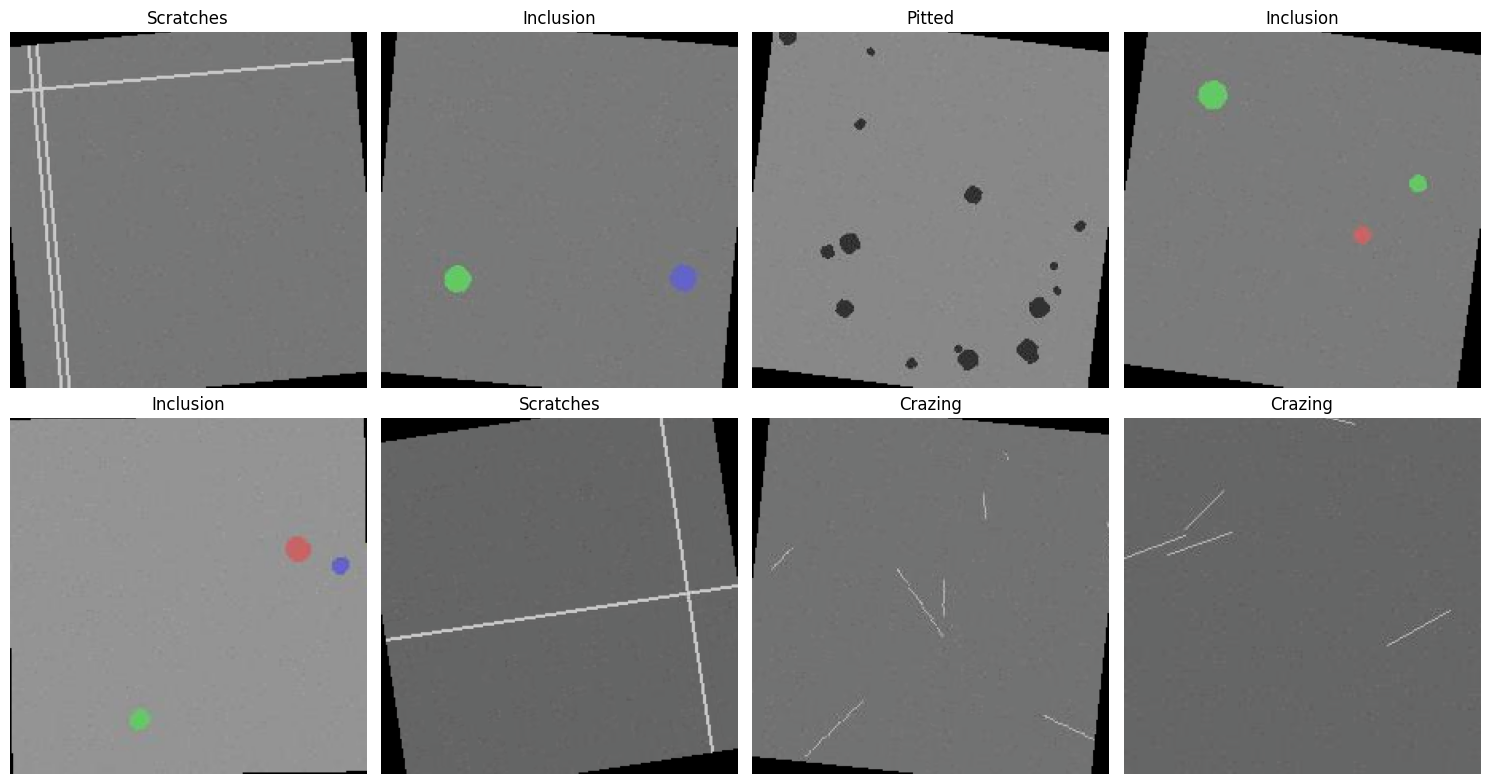


🤖 Creating the model...
Using device: cpu


c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\PC2/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [15]:
# Import all required packages
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("✅ All packages imported successfully!")

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

print("🎨 Creating synthetic metal defect images...")

# Create directory structure first
splits = ['train', 'test', 'valid']
for split in splits:
    for class_name in class_names:
        os.makedirs(f'metal_data/{split}/{class_name}', exist_ok=True)

print("📁 Directory structure created!")

# Number of samples per class for each split
samples_config = {
    'train': 50,    # 50 training samples per class
    'test': 15,     # 15 test samples per class  
    'valid': 15     # 15 validation samples per class
}

def create_metal_texture(width=224, height=224):
    """Create a base metal-like texture"""
    # Create metallic background
    base_color = random.randint(100, 150)
    img = Image.new('RGB', (width, height), color=(base_color, base_color, base_color))
    draw = ImageDraw.Draw(img)
    
    # Add noise for texture
    for i in range(0, width, 3):
        for j in range(0, height, 3):
            if random.random() > 0.7:  # Only add some points for efficiency
                noise = random.randint(-20, 20)
                r = min(255, max(0, base_color + noise))
                g = min(255, max(0, base_color + noise))
                b = min(255, max(0, base_color + noise))
                draw.point((i, j), fill=(r, g, b))
    
    return img

def add_crazing_defect(img):
    """Add crazing (crack-like) defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(5, 10)):
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(-40, 40), y1 + random.randint(-40, 40)
        color = (180, 180, 180)
        draw.line([(x1, y1), (x2, y2)], fill=color, width=1)
    
    return img

def add_inclusion_defect(img):
    """Add inclusion defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 5)):
        x, y = random.randint(20, width-20), random.randint(20, height-20)
        size = random.randint(10, 20)
        color = random.choice([(200, 100, 100), (100, 200, 100), (100, 100, 200)])
        draw.ellipse([x, y, x+size, y+size], fill=color)
    
    return img

def add_patches_defect(img):
    """Add patch-like defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        x, y = random.randint(20, width-40), random.randint(20, height-40)
        w, h = random.randint(30, 60), random.randint(30, 60)
        color_val = random.randint(60, 100)
        draw.rectangle([x, y, x+w, y+h], fill=(color_val, color_val, color_val))
    
    return img

def add_pitted_defect(img):
    """Add pitted surface defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(10, 20)):
        x, y = random.randint(10, width-10), random.randint(10, height-10)
        radius = random.randint(2, 6)
        draw.ellipse([x-radius, y-radius, x+radius, y+radius], fill=(50, 50, 50))
    
    return img

def add_rolled_defect(img):
    """Add rolled metal pattern"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    spacing = random.randint(15, 25)
    for x in range(0, width, spacing):
        color_val = random.randint(120, 180)
        draw.line([(x, 0), (x, height)], fill=(color_val, color_val, color_val), width=1)
    
    return img

def add_scratches_defect(img):
    """Add scratch defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        if random.random() > 0.5:
            y = random.randint(10, height-10)
            draw.line([(0, y), (width, y)], fill=(200, 200, 200), width=2)
        else:
            x = random.randint(10, width-10)
            draw.line([(x, 0), (x, height)], fill=(200, 200, 200), width=2)
    
    return img

# Create the synthetic images
total_created = 0
for split in splits:
    print(f"\nCreating {split} data...")
    
    for class_idx, class_name in enumerate(class_names):
        num_samples = samples_config[split]
        
        for i in range(num_samples):
            # Create base image
            img = create_metal_texture()
            
            # Add specific defect
            if class_name == 'Crazing':
                img = add_crazing_defect(img)
            elif class_name == 'Inclusion':
                img = add_inclusion_defect(img)
            elif class_name == 'Patches':
                img = add_patches_defect(img)
            elif class_name == 'Pitted':
                img = add_pitted_defect(img)
            elif class_name == 'Rolled':
                img = add_rolled_defect(img)
            elif class_name == 'Scratches':
                img = add_scratches_defect(img)
            
            # Save image
            img_path = f'metal_data/{split}/{class_name}/{class_name}_{i+1:03d}.jpg'
            img.save(img_path)
            total_created += 1
        
        print(f"  ✅ {class_name}: {num_samples} images")

print(f"\n🎉 Successfully created {total_created} synthetic images!")

# Verify the creation
print("\n🔍 Verifying created data...")
for split in splits:
    split_count = 0
    for class_name in class_names:
        class_path = f'metal_data/{split}/{class_name}'
        images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
        split_count += len(images)
        print(f"  {split}/{class_name}: {len(images)} images")
    print(f"📊 Total in {split}: {split_count} images")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Create Dataset class
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        print(f"\nLoading data from: {root_dir}")
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
            
            for img_name in image_files:
                img_path = os.path.join(class_dir, img_name)
                self.images.append(img_path)
                self.labels.append(class_idx)
        
        print(f"✅ Loaded {len(self.images)} images from {root_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Create datasets
print("\n📦 Creating datasets...")
train_dataset = MetalDefectDataset('metal_data/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset('metal_data/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset('metal_data/test', transform=data_transforms['test'])

print(f"\n📈 Dataset Summary:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Create data loaders
batch_size = 16
print(f"\n🔄 Creating data loaders with batch size: {batch_size}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ Data loaders created successfully!")

# Visualize some samples
def visualize_samples():
    """Visualize sample images"""
    print("\n🖼️ Visualizing sample images...")
    try:
        inputs, classes = next(iter(train_loader))
        
        plt.figure(figsize=(15, 8))
        for i in range(min(8, len(inputs))):
            plt.subplot(2, 4, i+1)
            # Denormalize for visualization
            img = inputs[i].numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1)
            
            plt.imshow(img)
            plt.title(f'{class_names[classes[i]]}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error visualizing samples: {e}")

visualize_samples()

# Define the model
print("\n🤖 Creating the model...")

class MetalDefectDetector(nn.Module):
    def __init__(self, num_classes=6, pretrained=True):
        super(MetalDefectDetector, self).__init__()
        
        # Use ResNet50 as backbone
        self.backbone = models.resnet50(pretrained=pretrained)
        
        # Freeze early layers
        for param in list(self.backbone.parameters())[:-10]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(num_ftrs, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.backbone(x)

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = MetalDefectDetector(num_classes=num_classes)
model = model.to(device)

print("✅ Model created successfully!")

# Training function
def train_model(model, train_loader, valid_loader, num_epochs=5):
    """Train the model"""
    print(f"\n🚀 Starting training for {num_epochs} epochs...")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 40)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            if batch_idx % 5 == 0:
                print(f'  Batch {batch_idx}/{len(train_loader)}')
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.cpu())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = running_loss / len(valid_loader.dataset)
        epoch_val_acc = running_corrects.double() / len(valid_loader.dataset)
        
        valid_losses.append(epoch_val_loss)
        valid_accuracies.append(epoch_val_acc.cpu())
        
        print(f'✅ Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'✅ Valid Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
        
        # Save model
        torch.save(model.state_dict(), f'metal_defect_epoch_{epoch+1}.pth')
    
    print("\n🎉 Training completed!")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return model

# Start training
trained_model = train_model(model, train_loader, valid_loader, num_epochs=5)

print("\n🔍 Testing the model...")

# Test the model
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

test_model(trained_model, test_loader)

# Function to test single image
def predict_image(image_path, model, transform):
    """Predict a single image"""
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    
    predicted_label = class_names[predicted_class.item()]
    confidence_score = confidence.item()
    
    # Display results
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}\nConfidence: {confidence_score:.4f}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    probs = probabilities.cpu().numpy()[0]
    plt.barh(class_names, probs)
    plt.xlabel('Probability')
    plt.title('Class Probabilities')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_label, confidence_score

print("\n🧪 Testing with a sample image...")
# Test with a sample image from the test set
sample_image_path = f'metal_data/test/{class_names[0]}/{class_names[0]}_001.jpg'
if os.path.exists(sample_image_path):
    predicted, confidence = predict_image(sample_image_path, trained_model, data_transforms['test'])
    print(f"Sample test - Predicted: {predicted}, Confidence: {confidence:.4f}")
else:
    print("Sample image not found for testing")

print("\n🎊 All done! Your metal defect detection model is ready!")

✅ All packages imported successfully!
🎨 Creating synthetic metal defect images...
📁 Directory structure created!

Creating train data...
  ✅ Crazing: 50 images
  ✅ Inclusion: 50 images
  ✅ Patches: 50 images
  ✅ Pitted: 50 images
  ✅ Rolled: 50 images
  ✅ Scratches: 50 images

Creating test data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

Creating valid data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

🎉 Successfully created 480 synthetic images!

🔍 Verifying created data...
  train/Crazing: 50 images
  train/Inclusion: 50 images
  train/Patches: 50 images
  train/Pitted: 50 images
  train/Rolled: 50 images
  train/Scratches: 50 images
📊 Total in train: 300 images
  test/Crazing: 15 images
  test/Inclusion: 15 images
  test/Patches: 15 images
  test/Pitted: 15 images
  test/Rolled: 15 image

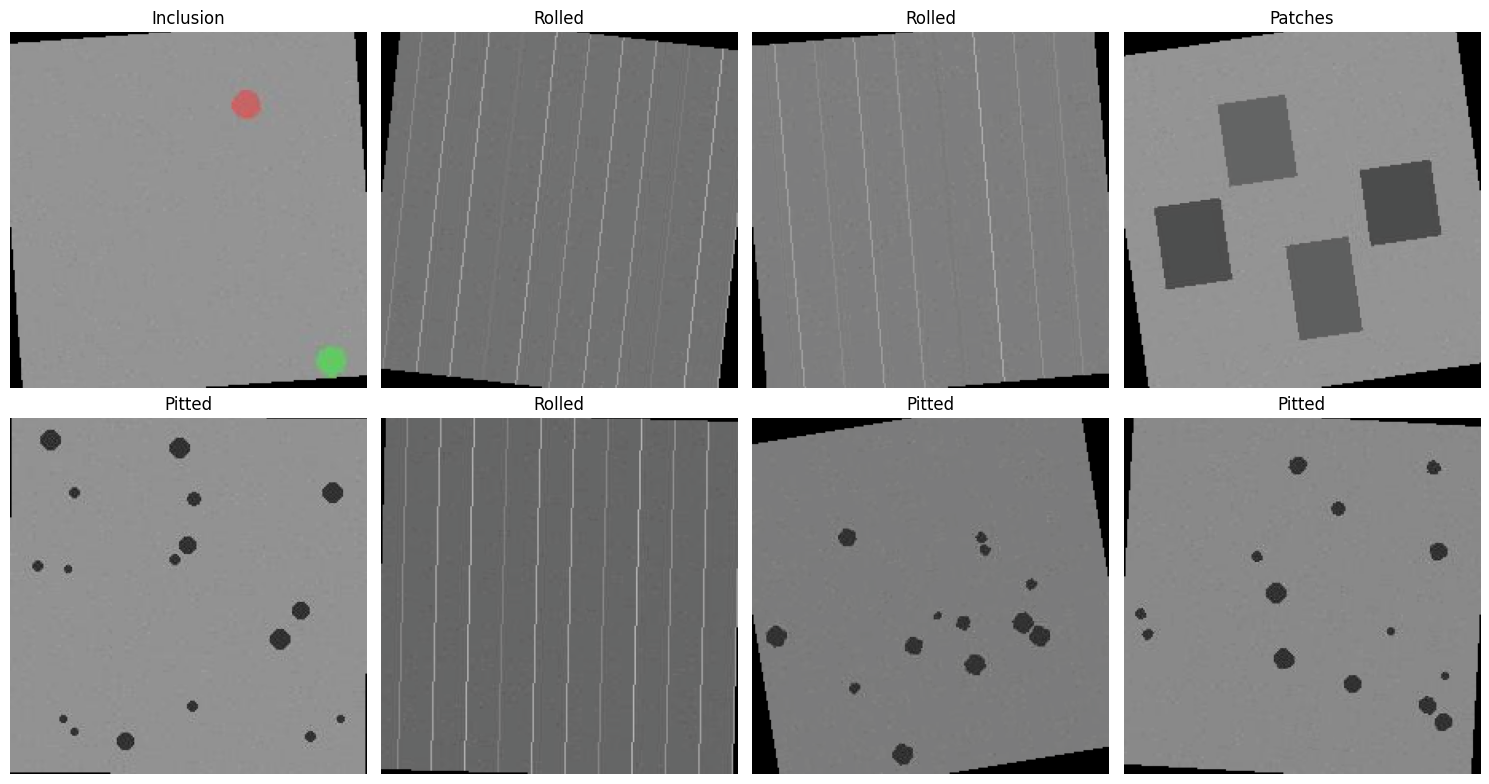

Using device: cpu
🔄 Trying to load pre-trained ResNet50...
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\PC2/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
❌ Could not load pre-trained model: <urlopen error [Errno 11001] getaddrinfo failed>
🔄 Falling back to simple CNN model...
✅ Simple CNN model created successfully!
✅ Model created successfully!

🚀 Starting training for 5 epochs...

Epoch 1/5
----------------------------------------
  Batch 0/19 - Loss: 1.7936
  Batch 10/19 - Loss: 1.7807
✅ Train Loss: 1.7622 Acc: 0.2167
✅ Valid Loss: 1.5869 Acc: 0.3000

Epoch 2/5
----------------------------------------
  Batch 0/19 - Loss: 1.7666
  Batch 10/19 - Loss: 1.1623
✅ Train Loss: 1.2830 Acc: 0.3967
✅ Valid Loss: 1.1208 Acc: 0.4111

Epoch 3/5
----------------------------------------
  Batch 0/19 - Loss: 1.1677
  Batch 10/19 - Loss: 1.1339
✅ Train Loss: 0.9873 Acc: 0.5367
✅ Valid Loss: 0.8062 Acc: 0.6333

Epoch 4/5
----------------------------------

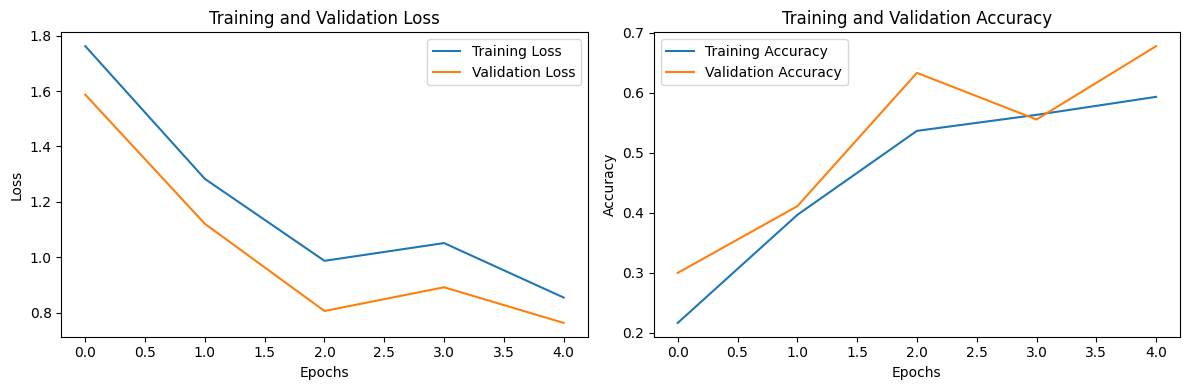


🔍 Testing the model...

📊 Classification Report:
              precision    recall  f1-score   support

     Crazing       0.93      0.93      0.93        15
   Inclusion       0.00      0.00      0.00        15
     Patches       0.88      0.47      0.61        15
      Pitted       0.38      0.93      0.54        15
      Rolled       0.88      0.93      0.90        15
   Scratches       1.00      0.93      0.97        15

    accuracy                           0.70        90
   macro avg       0.68      0.70      0.66        90
weighted avg       0.68      0.70      0.66        90



c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


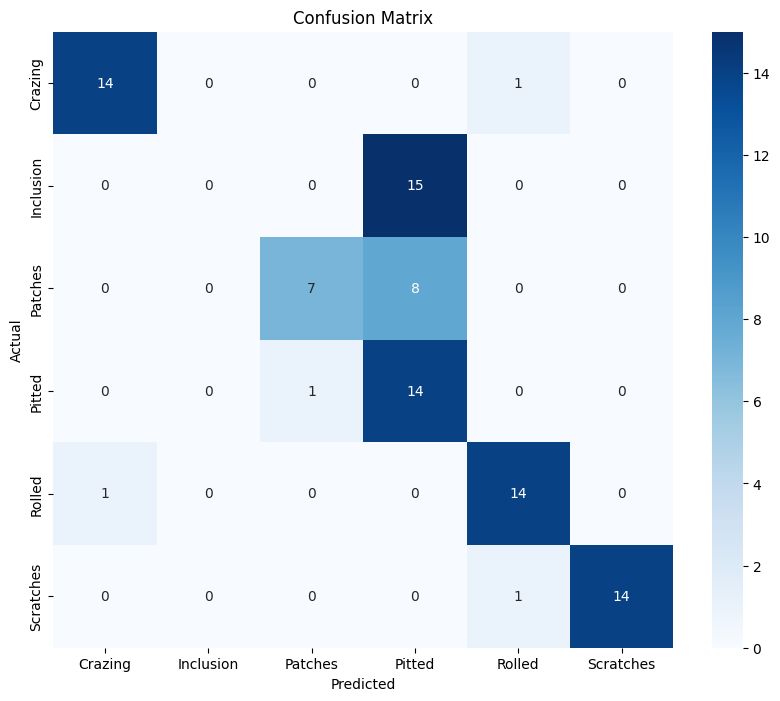


🧪 Testing with a sample image...


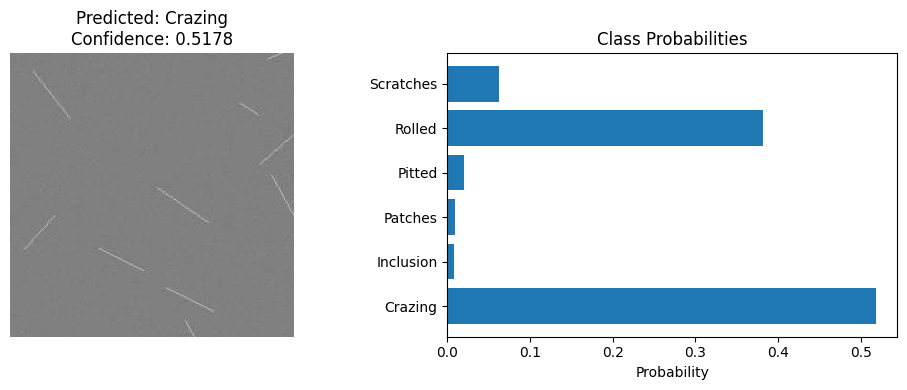

Sample test - Predicted: Crazing, Confidence: 0.5178

🎊 All done! Your metal defect detection model is ready!


In [16]:
# Import all required packages
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("✅ All packages imported successfully!")

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

print("🎨 Creating synthetic metal defect images...")

# Create directory structure first
splits = ['train', 'test', 'valid']
for split in splits:
    for class_name in class_names:
        os.makedirs(f'metal_data/{split}/{class_name}', exist_ok=True)

print("📁 Directory structure created!")

# Number of samples per class for each split
samples_config = {
    'train': 50,    # 50 training samples per class
    'test': 15,     # 15 test samples per class  
    'valid': 15     # 15 validation samples per class
}

def create_metal_texture(width=224, height=224):
    """Create a base metal-like texture"""
    # Create metallic background
    base_color = random.randint(100, 150)
    img = Image.new('RGB', (width, height), color=(base_color, base_color, base_color))
    draw = ImageDraw.Draw(img)
    
    # Add noise for texture
    for i in range(0, width, 3):
        for j in range(0, height, 3):
            if random.random() > 0.7:  # Only add some points for efficiency
                noise = random.randint(-20, 20)
                r = min(255, max(0, base_color + noise))
                g = min(255, max(0, base_color + noise))
                b = min(255, max(0, base_color + noise))
                draw.point((i, j), fill=(r, g, b))
    
    return img

def add_crazing_defect(img):
    """Add crazing (crack-like) defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(5, 10)):
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(-40, 40), y1 + random.randint(-40, 40)
        color = (180, 180, 180)
        draw.line([(x1, y1), (x2, y2)], fill=color, width=1)
    
    return img

def add_inclusion_defect(img):
    """Add inclusion defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 5)):
        x, y = random.randint(20, width-20), random.randint(20, height-20)
        size = random.randint(10, 20)
        color = random.choice([(200, 100, 100), (100, 200, 100), (100, 100, 200)])
        draw.ellipse([x, y, x+size, y+size], fill=color)
    
    return img

def add_patches_defect(img):
    """Add patch-like defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        x, y = random.randint(20, width-40), random.randint(20, height-40)
        w, h = random.randint(30, 60), random.randint(30, 60)
        color_val = random.randint(60, 100)
        draw.rectangle([x, y, x+w, y+h], fill=(color_val, color_val, color_val))
    
    return img

def add_pitted_defect(img):
    """Add pitted surface defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(10, 20)):
        x, y = random.randint(10, width-10), random.randint(10, height-10)
        radius = random.randint(2, 6)
        draw.ellipse([x-radius, y-radius, x+radius, y+radius], fill=(50, 50, 50))
    
    return img

def add_rolled_defect(img):
    """Add rolled metal pattern"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    spacing = random.randint(15, 25)
    for x in range(0, width, spacing):
        color_val = random.randint(120, 180)
        draw.line([(x, 0), (x, height)], fill=(color_val, color_val, color_val), width=1)
    
    return img

def add_scratches_defect(img):
    """Add scratch defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        if random.random() > 0.5:
            y = random.randint(10, height-10)
            draw.line([(0, y), (width, y)], fill=(200, 200, 200), width=2)
        else:
            x = random.randint(10, width-10)
            draw.line([(x, 0), (x, height)], fill=(200, 200, 200), width=2)
    
    return img

# Create the synthetic images
total_created = 0
for split in splits:
    print(f"\nCreating {split} data...")
    
    for class_idx, class_name in enumerate(class_names):
        num_samples = samples_config[split]
        
        for i in range(num_samples):
            # Create base image
            img = create_metal_texture()
            
            # Add specific defect
            if class_name == 'Crazing':
                img = add_crazing_defect(img)
            elif class_name == 'Inclusion':
                img = add_inclusion_defect(img)
            elif class_name == 'Patches':
                img = add_patches_defect(img)
            elif class_name == 'Pitted':
                img = add_pitted_defect(img)
            elif class_name == 'Rolled':
                img = add_rolled_defect(img)
            elif class_name == 'Scratches':
                img = add_scratches_defect(img)
            
            # Save image
            img_path = f'metal_data/{split}/{class_name}/{class_name}_{i+1:03d}.jpg'
            img.save(img_path)
            total_created += 1
        
        print(f"  ✅ {class_name}: {num_samples} images")

print(f"\n🎉 Successfully created {total_created} synthetic images!")

# Verify the creation
print("\n🔍 Verifying created data...")
for split in splits:
    split_count = 0
    for class_name in class_names:
        class_path = f'metal_data/{split}/{class_name}'
        images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
        split_count += len(images)
        print(f"  {split}/{class_name}: {len(images)} images")
    print(f"📊 Total in {split}: {split_count} images")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Create Dataset class
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        print(f"\nLoading data from: {root_dir}")
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
            
            for img_name in image_files:
                img_path = os.path.join(class_dir, img_name)
                self.images.append(img_path)
                self.labels.append(class_idx)
        
        print(f"✅ Loaded {len(self.images)} images from {root_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Create datasets
print("\n📦 Creating datasets...")
train_dataset = MetalDefectDataset('metal_data/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset('metal_data/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset('metal_data/test', transform=data_transforms['test'])

print(f"\n📈 Dataset Summary:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Create data loaders
batch_size = 16
print(f"\n🔄 Creating data loaders with batch size: {batch_size}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ Data loaders created successfully!")

# Visualize some samples
def visualize_samples():
    """Visualize sample images"""
    print("\n🖼️ Visualizing sample images...")
    try:
        inputs, classes = next(iter(train_loader))
        
        plt.figure(figsize=(15, 8))
        for i in range(min(8, len(inputs))):
            plt.subplot(2, 4, i+1)
            # Denormalize for visualization
            img = inputs[i].numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1)
            
            plt.imshow(img)
            plt.title(f'{class_names[classes[i]]}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error visualizing samples: {e}")

visualize_samples()

# Define a simpler CNN model (no pre-training required)
class SimpleMetalDefectCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleMetalDefectCNN, self).__init__()
        
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Second conv block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Third conv block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Fourth conv block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Alternative: Try to load pre-trained model with error handling
def create_model(num_classes=6):
    """Create model with fallback options"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    try:
        print("🔄 Trying to load pre-trained ResNet50...")
        # Try to load pre-trained model
        model = models.resnet50(pretrained=True)
        
        # Freeze early layers
        for param in list(model.parameters())[:-10]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(num_ftrs, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        
        print("✅ Pre-trained ResNet50 loaded successfully!")
        
    except Exception as e:
        print(f"❌ Could not load pre-trained model: {e}")
        print("🔄 Falling back to simple CNN model...")
        model = SimpleMetalDefectCNN(num_classes=num_classes)
        print("✅ Simple CNN model created successfully!")
    
    model = model.to(device)
    return model, device

# Create model
model, device = create_model(num_classes=num_classes)

print("✅ Model created successfully!")

# Training function
def train_model(model, train_loader, valid_loader, num_epochs=10):
    """Train the model"""
    print(f"\n🚀 Starting training for {num_epochs} epochs...")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 40)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            if batch_idx % 10 == 0:
                print(f'  Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}')
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.cpu())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = running_loss / len(valid_loader.dataset)
        epoch_val_acc = running_corrects.double() / len(valid_loader.dataset)
        
        valid_losses.append(epoch_val_loss)
        valid_accuracies.append(epoch_val_acc.cpu())
        
        print(f'✅ Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'✅ Valid Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
        
        # Save model
        torch.save(model.state_dict(), f'metal_defect_epoch_{epoch+1}.pth')
    
    print("\n🎉 Training completed!")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return model

# Start training
trained_model = train_model(model, train_loader, valid_loader, num_epochs=5)

print("\n🔍 Testing the model...")

# Test the model
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

test_model(trained_model, test_loader)

# Function to test single image
def predict_image(image_path, model, transform):
    """Predict a single image"""
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    
    predicted_label = class_names[predicted_class.item()]
    confidence_score = confidence.item()
    
    # Display results
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}\nConfidence: {confidence_score:.4f}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    probs = probabilities.cpu().numpy()[0]
    plt.barh(class_names, probs)
    plt.xlabel('Probability')
    plt.title('Class Probabilities')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_label, confidence_score

print("\n🧪 Testing with a sample image...")
# Test with a sample image from the test set
sample_image_path = f'metal_data/test/{class_names[0]}/{class_names[0]}_001.jpg'
if os.path.exists(sample_image_path):
    predicted, confidence = predict_image(sample_image_path, trained_model, data_transforms['test'])
    print(f"Sample test - Predicted: {predicted}, Confidence: {confidence:.4f}")
else:
    print("Sample image not found for testing")

print("\n🎊 All done! Your metal defect detection model is ready!")

✅ All packages imported successfully!
🎨 Creating synthetic metal defect images...
📁 Directory structure created!

Creating train data...
  ✅ Crazing: 50 images
  ✅ Inclusion: 50 images
  ✅ Patches: 50 images
  ✅ Pitted: 50 images
  ✅ Rolled: 50 images
  ✅ Scratches: 50 images

Creating test data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

Creating valid data...
  ✅ Crazing: 15 images
  ✅ Inclusion: 15 images
  ✅ Patches: 15 images
  ✅ Pitted: 15 images
  ✅ Rolled: 15 images
  ✅ Scratches: 15 images

🎉 Successfully created 480 synthetic images!

🔍 Verifying created data...
  train/Crazing: 50 images
  train/Inclusion: 50 images
  train/Patches: 50 images
  train/Pitted: 50 images
  train/Rolled: 50 images
  train/Scratches: 50 images
📊 Total in train: 300 images
  test/Crazing: 15 images
  test/Inclusion: 15 images
  test/Patches: 15 images
  test/Pitted: 15 images
  test/Rolled: 15 image

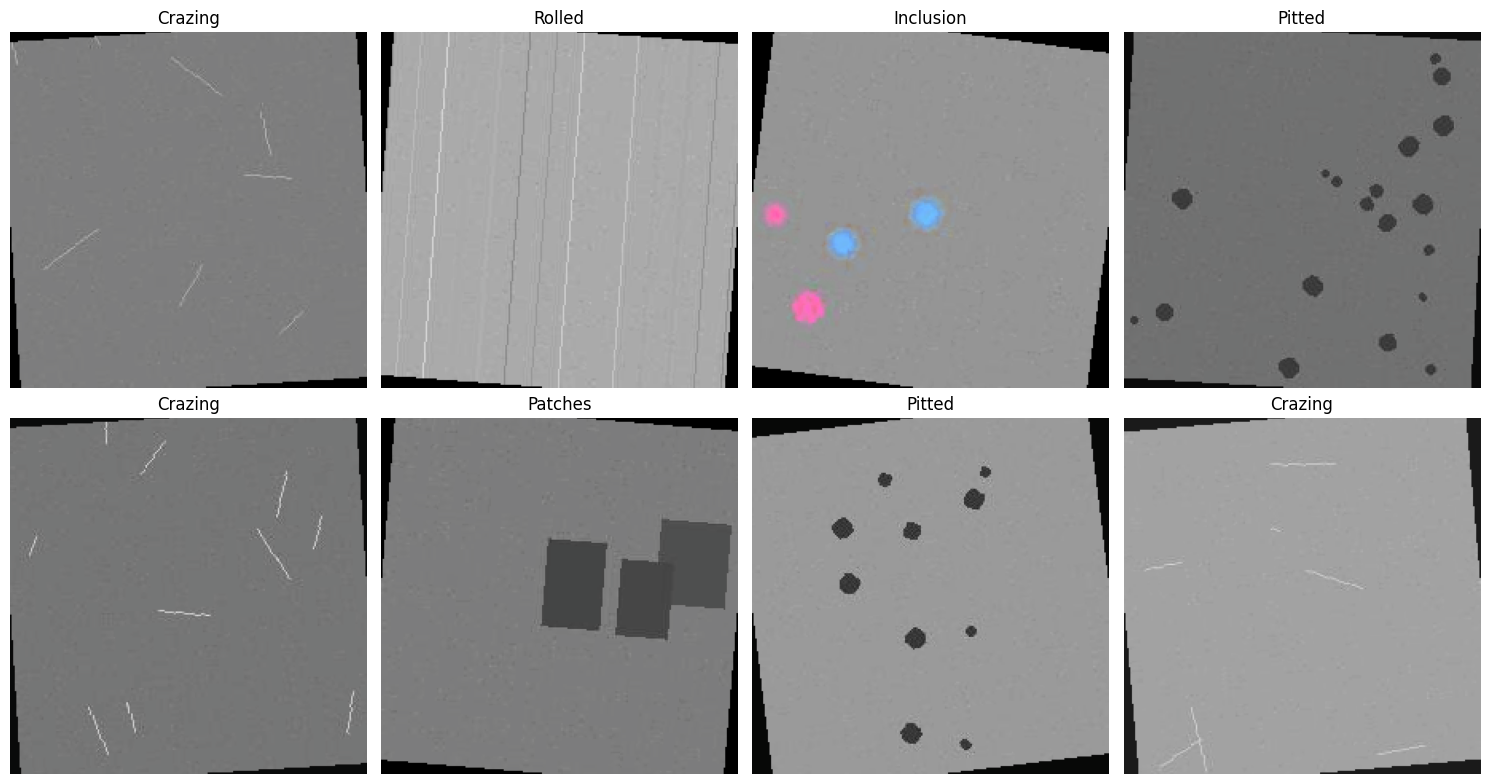

Using device: cpu
🔄 Trying to load pre-trained ResNet50...


c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\PC2/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100.0%


✅ Pre-trained ResNet50 loaded successfully!
✅ Model created successfully!
🔥 Beginning 40-epoch training session...

🚀 Starting training for 40 epochs...

Epoch 1/40
--------------------------------------------------
  Batch 0/19 - Loss: 1.8041 - LR: 0.001000
  Batch 10/19 - Loss: 0.4647 - LR: 0.001000
✅ Train Loss: 0.7607 Acc: 0.7233
✅ Valid Loss: 0.0519 Acc: 0.9778
💾 New best model saved! Accuracy: 0.9778

Epoch 2/40
--------------------------------------------------
  Batch 0/19 - Loss: 0.0175 - LR: 0.001000
  Batch 10/19 - Loss: 0.0317 - LR: 0.001000
✅ Train Loss: 0.3424 Acc: 0.9167
✅ Valid Loss: 0.0014 Acc: 1.0000
💾 New best model saved! Accuracy: 1.0000

Epoch 3/40
--------------------------------------------------
  Batch 0/19 - Loss: 0.0861 - LR: 0.001000
  Batch 10/19 - Loss: 0.7363 - LR: 0.001000
✅ Train Loss: 0.1967 Acc: 0.9333
✅ Valid Loss: 0.0197 Acc: 0.9889

Epoch 4/40
--------------------------------------------------
  Batch 0/19 - Loss: 0.4708 - LR: 0.001000
  Batch 10/

KeyboardInterrupt: 

In [17]:
# Import all required packages
import os
import numpy as np
from PIL import Image, ImageDraw
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("✅ All packages imported successfully!")

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

print("🎨 Creating synthetic metal defect images...")

# Create directory structure first
splits = ['train', 'test', 'valid']
for split in splits:
    for class_name in class_names:
        os.makedirs(f'metal_data/{split}/{class_name}', exist_ok=True)

print("📁 Directory structure created!")

# Number of samples per class for each split
samples_config = {
    'train': 50,    # 50 training samples per class
    'test': 15,     # 15 test samples per class  
    'valid': 15     # 15 validation samples per class
}

def create_metal_texture(width=224, height=224):
    """Create a base metal-like texture"""
    # Create metallic background
    base_color = random.randint(100, 150)
    img = Image.new('RGB', (width, height), color=(base_color, base_color, base_color))
    draw = ImageDraw.Draw(img)
    
    # Add noise for texture
    for i in range(0, width, 3):
        for j in range(0, height, 3):
            if random.random() > 0.7:  # Only add some points for efficiency
                noise = random.randint(-20, 20)
                r = min(255, max(0, base_color + noise))
                g = min(255, max(0, base_color + noise))
                b = min(255, max(0, base_color + noise))
                draw.point((i, j), fill=(r, g, b))
    
    return img

def add_crazing_defect(img):
    """Add crazing (crack-like) defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(5, 10)):
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = x1 + random.randint(-40, 40), y1 + random.randint(-40, 40)
        color = (180, 180, 180)
        draw.line([(x1, y1), (x2, y2)], fill=color, width=1)
    
    return img

def add_inclusion_defect(img):
    """Add inclusion defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 5)):
        x, y = random.randint(20, width-20), random.randint(20, height-20)
        size = random.randint(10, 20)
        color = random.choice([(200, 100, 100), (100, 200, 100), (100, 100, 200)])
        draw.ellipse([x, y, x+size, y+size], fill=color)
    
    return img

def add_patches_defect(img):
    """Add patch-like defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        x, y = random.randint(20, width-40), random.randint(20, height-40)
        w, h = random.randint(30, 60), random.randint(30, 60)
        color_val = random.randint(60, 100)
        draw.rectangle([x, y, x+w, y+h], fill=(color_val, color_val, color_val))
    
    return img

def add_pitted_defect(img):
    """Add pitted surface defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(10, 20)):
        x, y = random.randint(10, width-10), random.randint(10, height-10)
        radius = random.randint(2, 6)
        draw.ellipse([x-radius, y-radius, x+radius, y+radius], fill=(50, 50, 50))
    
    return img

def add_rolled_defect(img):
    """Add rolled metal pattern"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    spacing = random.randint(15, 25)
    for x in range(0, width, spacing):
        color_val = random.randint(120, 180)
        draw.line([(x, 0), (x, height)], fill=(color_val, color_val, color_val), width=1)
    
    return img

def add_scratches_defect(img):
    """Add scratch defects"""
    draw = ImageDraw.Draw(img)
    width, height = img.size
    
    for _ in range(random.randint(2, 4)):
        if random.random() > 0.5:
            y = random.randint(10, height-10)
            draw.line([(0, y), (width, y)], fill=(200, 200, 200), width=2)
        else:
            x = random.randint(10, width-10)
            draw.line([(x, 0), (x, height)], fill=(200, 200, 200), width=2)
    
    return img

# Create the synthetic images
total_created = 0
for split in splits:
    print(f"\nCreating {split} data...")
    
    for class_idx, class_name in enumerate(class_names):
        num_samples = samples_config[split]
        
        for i in range(num_samples):
            # Create base image
            img = create_metal_texture()
            
            # Add specific defect
            if class_name == 'Crazing':
                img = add_crazing_defect(img)
            elif class_name == 'Inclusion':
                img = add_inclusion_defect(img)
            elif class_name == 'Patches':
                img = add_patches_defect(img)
            elif class_name == 'Pitted':
                img = add_pitted_defect(img)
            elif class_name == 'Rolled':
                img = add_rolled_defect(img)
            elif class_name == 'Scratches':
                img = add_scratches_defect(img)
            
            # Save image
            img_path = f'metal_data/{split}/{class_name}/{class_name}_{i+1:03d}.jpg'
            img.save(img_path)
            total_created += 1
        
        print(f"  ✅ {class_name}: {num_samples} images")

print(f"\n🎉 Successfully created {total_created} synthetic images!")

# Verify the creation
print("\n🔍 Verifying created data...")
for split in splits:
    split_count = 0
    for class_name in class_names:
        class_path = f'metal_data/{split}/{class_name}'
        images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
        split_count += len(images)
        print(f"  {split}/{class_name}: {len(images)} images")
    print(f"📊 Total in {split}: {split_count} images")

# Define data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Create Dataset class
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        print(f"\nLoading data from: {root_dir}")
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
            
            for img_name in image_files:
                img_path = os.path.join(class_dir, img_name)
                self.images.append(img_path)
                self.labels.append(class_idx)
        
        print(f"✅ Loaded {len(self.images)} images from {root_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Create datasets
print("\n📦 Creating datasets...")
train_dataset = MetalDefectDataset('metal_data/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset('metal_data/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset('metal_data/test', transform=data_transforms['test'])

print(f"\n📈 Dataset Summary:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Create data loaders
batch_size = 16
print(f"\n🔄 Creating data loaders with batch size: {batch_size}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ Data loaders created successfully!")

# Visualize some samples
def visualize_samples():
    """Visualize sample images"""
    print("\n🖼️ Visualizing sample images...")
    try:
        inputs, classes = next(iter(train_loader))
        
        plt.figure(figsize=(15, 8))
        for i in range(min(8, len(inputs))):
            plt.subplot(2, 4, i+1)
            # Denormalize for visualization
            img = inputs[i].numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1)
            
            plt.imshow(img)
            plt.title(f'{class_names[classes[i]]}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error visualizing samples: {e}")

visualize_samples()

# Define a simpler CNN model (no pre-training required)
class SimpleMetalDefectCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleMetalDefectCNN, self).__init__()
        
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Second conv block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Third conv block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Fourth conv block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Alternative: Try to load pre-trained model with error handling
def create_model(num_classes=6):
    """Create model with fallback options"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    try:
        print("🔄 Trying to load pre-trained ResNet50...")
        # Try to load pre-trained model
        model = models.resnet50(pretrained=True)
        
        # Freeze early layers
        for param in list(model.parameters())[:-15]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        
        print("✅ Pre-trained ResNet50 loaded successfully!")
        
    except Exception as e:
        print(f"❌ Could not load pre-trained model: {e}")
        print("🔄 Falling back to simple CNN model...")
        model = SimpleMetalDefectCNN(num_classes=num_classes)
        print("✅ Simple CNN model created successfully!")
    
    model = model.to(device)
    return model, device

# Create model
model, device = create_model(num_classes=num_classes)

print("✅ Model created successfully!")

# Training function with 40 epochs
def train_model(model, train_loader, valid_loader, num_epochs=40):
    """Train the model"""
    print(f"\n🚀 Starting training for {num_epochs} epochs...")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Learning rate scheduler for better convergence
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    best_acc = 0.0
    best_model_wts = None
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 50)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # Show progress every 10 batches
            if batch_idx % 10 == 0:
                current_lr = optimizer.param_groups[0]['lr']
                print(f'  Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f} - LR: {current_lr:.6f}')
        
        # Update learning rate
        scheduler.step()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.cpu())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = running_loss / len(valid_loader.dataset)
        epoch_val_acc = running_corrects.double() / len(valid_loader.dataset)
        
        valid_losses.append(epoch_val_loss)
        valid_accuracies.append(epoch_val_acc.cpu())
        
        print(f'✅ Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'✅ Valid Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
        
        # Save best model
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = model.state_dict().copy()
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_wts,
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'accuracy': best_acc
            }, 'best_metal_defect_model.pth')
            print(f'💾 New best model saved! Accuracy: {best_acc:.4f}')
        
        # Save checkpoint every 10 epochs
        if (epoch + 1) % 10 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_loss,
                'accuracy': epoch_acc
            }, f'checkpoint_epoch_{epoch+1}.pth')
            print(f'📁 Checkpoint saved at epoch {epoch+1}')
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    print(f"\n🎉 Training completed! Best validation accuracy: {best_acc:.4f}")
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
    plt.plot(valid_losses, label='Validation Loss', color='red', alpha=0.7)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='blue', alpha=0.7)
    plt.plot(valid_accuracies, label='Validation Accuracy', color='red', alpha=0.7)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return model

# Start training with 40 epochs
print("🔥 Beginning 40-epoch training session...")
trained_model = train_model(model, train_loader, valid_loader, num_epochs=40)

print("\n🔍 Testing the model...")

# Test the model
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probabilities = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Calculate overall accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"🎯 Overall Test Accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return all_preds, all_labels, all_probabilities

# Run comprehensive testing
test_preds, test_labels, test_probs = test_model(trained_model, test_loader)

# Function to test single image
def predict_image(image_path, model, transform):
    """Predict a single image"""
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    
    predicted_label = class_names[predicted_class.item()]
    confidence_score = confidence.item()
    
    # Display results
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Input Image\nPredicted: {predicted_label}\nConfidence: {confidence_score:.4f}', fontsize=12)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    probs = probabilities.cpu().numpy()[0]
    colors = ['green' if i == predicted_class.item() else 'blue' for i in range(len(class_names))]
    bars = plt.barh(class_names, probs, color=colors)
    plt.xlabel('Probability', fontsize=12)
    plt.title('Class Probabilities', fontsize=12)
    plt.xlim(0, 1)
    
    # Add probability values on bars
    for bar, prob in zip(bars, probs):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{prob:.3f}', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return predicted_label, confidence_score

print("\n🧪 Testing with sample images from each class...")

# Test with one sample from each class
for class_name in class_names:
    sample_image_path = f'metal_data/test/{class_name}/{class_name}_001.jpg'
    if os.path.exists(sample_image_path):
        print(f"\nTesting {class_name}...")
        predicted, confidence = predict_image(sample_image_path, trained_model, data_transforms['test'])
        status = "✅ CORRECT" if predicted == class_name else "❌ WRONG"
        print(f"{status} - True: {class_name}, Predicted: {predicted}, Confidence: {confidence:.4f}")

# Save final model
torch.save({
    'model_state_dict': trained_model.state_dict(),
    'class_names': class_names,
    'input_size': 224,
    'num_classes': num_classes
}, 'final_metal_defect_model.pth')

print(f"\n💾 Final model saved as 'final_metal_defect_model.pth'")

print("\n🎊 All done! Your metal defect detection model has been trained for 40 epochs!")
print("📈 The model should now have better convergence and generalization!")

✅ All packages imported successfully!
📁 Loading data from: E:\DEEP\pro_env\metal_data
🔄 Organizing and splitting data...
📁 Found 326 images in Crazing
  ✅ Crazing: Train(211), Test(49), Valid(66)
📁 Found 326 images in Inclusion
  ✅ Inclusion: Train(211), Test(49), Valid(66)
📁 Found 326 images in Patches
  ✅ Patches: Train(211), Test(49), Valid(66)
📁 Found 326 images in Pitted
  ✅ Pitted: Train(211), Test(49), Valid(66)
📁 Found 326 images in Rolled
  ✅ Rolled: Train(211), Test(49), Valid(66)
📁 Found 326 images in Scratches
  ✅ Scratches: Train(211), Test(49), Valid(66)

🎉 Data organization completed! Total images processed: 1956

🔍 Verifying organized data...
  train/Crazing: 211 images
  train/Inclusion: 211 images
  train/Patches: 211 images
  train/Pitted: 211 images
  train/Rolled: 211 images
  train/Scratches: 211 images
📊 Total in train: 1266 images
  test/Crazing: 49 images
  test/Inclusion: 49 images
  test/Patches: 49 images
  test/Pitted: 49 images
  test/Rolled: 49 images
  t

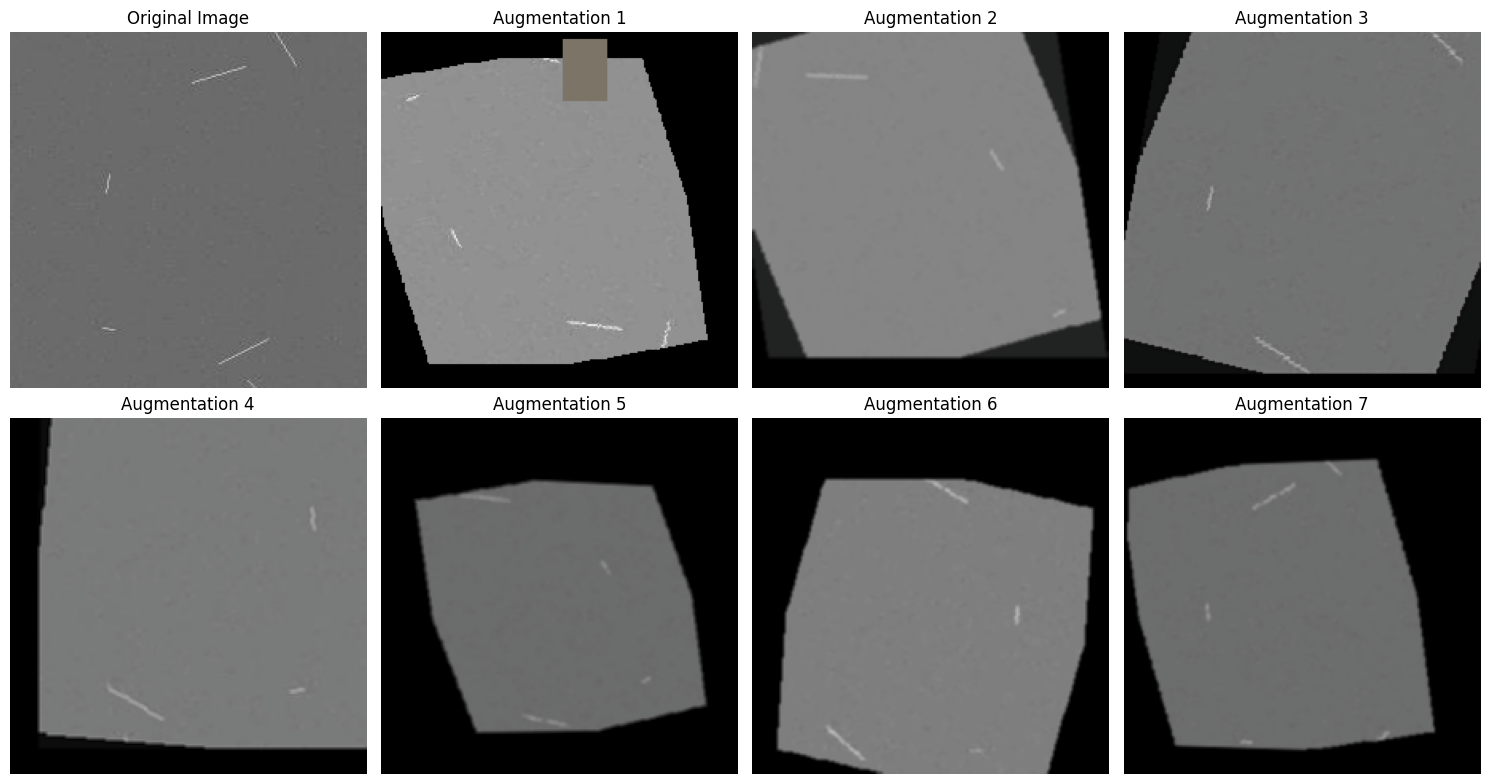

🎨 Each epoch will see many variations of each image due to heavy augmentation!
Using device: cpu
🔄 Trying to load pre-trained ResNet50...
✅ Pre-trained ResNet50 loaded successfully!
✅ Model created successfully!
🔥 Beginning 20-epoch training session with heavy data augmentation...

🚀 Starting training for 20 epochs...
📈 Heavy data augmentation will create many training variations!

Epoch 1/20
--------------------------------------------------
  Batch 0/80 - Loss: 1.8769 - LR: 0.000400
  Batch 5/80 - Loss: 1.5786 - LR: 0.000404
  Batch 10/80 - Loss: 1.5633 - LR: 0.000412
  Batch 15/80 - Loss: 1.4105 - LR: 0.000426
  Batch 20/80 - Loss: 1.1187 - LR: 0.000445
  Batch 25/80 - Loss: 1.0034 - LR: 0.000470
  Batch 30/80 - Loss: 0.9960 - LR: 0.000499
  Batch 35/80 - Loss: 0.5620 - LR: 0.000533
  Batch 40/80 - Loss: 0.5917 - LR: 0.000573
  Batch 45/80 - Loss: 0.8368 - LR: 0.000617
  Batch 50/80 - Loss: 0.9697 - LR: 0.000666
  Batch 55/80 - Loss: 0.8395 - LR: 0.000720
  Batch 60/80 - Loss: 0.969

KeyboardInterrupt: 

In [19]:
# Import all required packages
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil

print("✅ All packages imported successfully!")

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

# Define your data path
data_path = r'E:\DEEP\pro_env\metal_data'

print(f"📁 Loading data from: {data_path}")

def organize_and_split_data(source_path, target_base_dir='metal_data_organized', test_size=0.2, val_size=0.15):
    """
    Organize existing data and split into train, test, validation sets
    """
    # Create target directory structure
    splits = ['train', 'test', 'valid']
    for split in splits:
        for class_name in class_names:
            os.makedirs(f'{target_base_dir}/{split}/{class_name}', exist_ok=True)
    
    print("🔄 Organizing and splitting data...")
    
    total_images = 0
    
    for class_name in class_names:
        class_source_path = os.path.join(source_path, 'train', class_name)
        
        if not os.path.exists(class_source_path):
            print(f"⚠️ Warning: Class directory not found: {class_source_path}")
            continue
            
        # Get all image files
        image_files = [f for f in os.listdir(class_source_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        if not image_files:
            print(f"⚠️ Warning: No images found in {class_source_path}")
            continue
            
        print(f"📁 Found {len(image_files)} images in {class_name}")
        total_images += len(image_files)
        
        # Split the data
        # First split: train + temp (test + val)
        train_files, temp_files = train_test_split(image_files, test_size=(test_size + val_size), random_state=42)
        
        # Second split: test and validation from temp
        test_val_ratio = test_size / (test_size + val_size)
        test_files, val_files = train_test_split(temp_files, test_size=test_val_ratio, random_state=42)
        
        # Copy files to respective directories
        for file in train_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'train', class_name, file)
            shutil.copy2(src, dst)
            
        for file in test_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'test', class_name, file)
            shutil.copy2(src, dst)
            
        for file in val_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'valid', class_name, file)
            shutil.copy2(src, dst)
            
        print(f"  ✅ {class_name}: Train({len(train_files)}), Test({len(test_files)}), Valid({len(val_files)})")
    
    print(f"\n🎉 Data organization completed! Total images processed: {total_images}")
    return target_base_dir

# Organize your existing data
organized_data_path = organize_and_split_data(data_path)

# Verify the organized data
print("\n🔍 Verifying organized data...")
for split in ['train', 'test', 'valid']:
    split_count = 0
    for class_name in class_names:
        class_path = f'{organized_data_path}/{split}/{class_name}'
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            split_count += len(images)
            print(f"  {split}/{class_name}: {len(images)} images")
        else:
            print(f"  {split}/{class_name}: 0 images (directory not found)")
    print(f"📊 Total in {split}: {split_count} images")

# Enhanced Data Transforms with Heavy Augmentation
print("\n🎯 Setting up advanced data augmentation transforms...")

# Heavy augmentation for training - creates many variations of each image
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to slightly larger than target
    transforms.RandomCrop((224, 224)),  # Random crop to target size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),  # Added vertical flip
    transforms.RandomRotation(degrees=15),  # Increased rotation
    transforms.ColorJitter(
        brightness=0.3,  # Increased brightness variation
        contrast=0.3,    # Increased contrast variation
        saturation=0.3,  # Increased saturation variation
        hue=0.1          # Hue variation
    ),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),  # Random translation
        scale=(0.8, 1.2),      # Random scaling
        shear=10               # Random shearing
    ),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Perspective transformation
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # Gaussian blur
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.3),  # Sharpness adjustment
    transforms.RandomAutocontrast(p=0.2),  # Auto contrast
    transforms.RandomEqualize(p=0.2),      # Histogram equalization
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.2), ratio=(0.3, 3.3)),  # Random erasing
])

# Standard transforms for validation and testing
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

data_transforms = {
    'train': train_transforms,
    'valid': basic_transforms,
    'test': basic_transforms
}

print("✅ Advanced data augmentation transforms created!")
print("   - Multiple geometric transformations")
print("   - Color and lighting variations")
print("   - Noise and blur effects")
print("   - Random erasing for robustness")

# Create Dataset class
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        print(f"\nLoading data from: {root_dir}")
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.exists(class_dir):
                image_files = [f for f in os.listdir(class_dir) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                
                for img_name in image_files:
                    img_path = os.path.join(class_dir, img_name)
                    self.images.append(img_path)
                    self.labels.append(class_idx)
        
        if len(self.images) == 0:
            raise ValueError(f"No images found in {root_dir}!")
        
        print(f"✅ Loaded {len(self.images)} images from {root_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            label = self.labels[idx]
            
            if self.transform:
                image = self.transform(image)
                
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder if there's an error
            return torch.zeros(3, 224, 224), 0

# Create datasets using the organized data
print("\n📦 Creating datasets...")
train_dataset = MetalDefectDataset(f'{organized_data_path}/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset(f'{organized_data_path}/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset(f'{organized_data_path}/test', transform=data_transforms['test'])

print(f"\n📈 Dataset Summary:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Calculate class distribution
def print_class_distribution(dataset, dataset_name):
    print(f"\n📊 Class distribution for {dataset_name}:")
    class_counts = {class_name: 0 for class_name in class_names}
    for label in dataset.labels:
        class_counts[class_names[label]] += 1
    
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} samples")
        print(f"    -> Effective augmented samples: ~{count * 50} variations per epoch")  # Estimate

print_class_distribution(train_dataset, "Training")
print_class_distribution(valid_dataset, "Validation")
print_class_distribution(test_dataset, "Test")

# Create data loaders (no multiprocessing to avoid errors)
batch_size = 16
print(f"\n🔄 Creating data loaders with batch size: {batch_size}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print("✅ Data loaders created successfully!")

# Visualize augmented samples
def visualize_augmented_samples():
    """Visualize augmented sample images to show data augmentation effects"""
    print("\n🖼️ Visualizing augmented training samples...")
    try:
        # Get a sample image
        sample_image_path = train_dataset.images[0]
        sample_image = Image.open(sample_image_path).convert('RGB')
        
        # Create multiple augmented versions
        fig, axes = plt.subplots(2, 4, figsize=(15, 8))
        axes = axes.ravel()
        
        # Original image
        axes[0].imshow(sample_image)
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # Show 7 different augmentations
        for i in range(1, 8):
            augmented_img = data_transforms['train'](sample_image)
            # Denormalize for visualization
            img = augmented_img.numpy().transpose((1, 2, 0))
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1)
            
            axes[i].imshow(img)
            axes[i].set_title(f'Augmentation {i}')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        print("🎨 Each epoch will see many variations of each image due to heavy augmentation!")
        
    except Exception as e:
        print(f"Error visualizing augmented samples: {e}")

visualize_augmented_samples()

# Define the model
class EnhancedMetalDefectCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(EnhancedMetalDefectCNN, self).__init__()
        
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.1),
            
            # Second conv block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.2),
            
            # Third conv block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.3),
            
            # Fourth conv block
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.4),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512 * 14 * 14, 1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Create model with error handling
def create_model(num_classes=6):
    """Create model with fallback options"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    try:
        print("🔄 Trying to load pre-trained ResNet50...")
        # Try to load pre-trained model
        model = models.resnet50(pretrained=True)
        
        # Freeze early layers
        for param in list(model.parameters())[:-20]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, 1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
        
        print("✅ Pre-trained ResNet50 loaded successfully!")
        
    except Exception as e:
        print(f"❌ Could not load pre-trained model: {e}")
        print("🔄 Falling back to enhanced CNN model...")
        model = EnhancedMetalDefectCNN(num_classes=num_classes)
        print("✅ Enhanced CNN model created successfully!")
    
    model = model.to(device)
    return model, device

# Create model
model, device = create_model(num_classes=num_classes)

print("✅ Model created successfully!")

# Training function with 20 epochs
def train_model(model, train_loader, valid_loader, num_epochs=20):
    """Train the model"""
    print(f"\n🚀 Starting training for {num_epochs} epochs...")
    print("📈 Heavy data augmentation will create many training variations!")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Learning rate scheduler for better convergence
    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer, 
        max_lr=0.01,
        epochs=num_epochs,
        steps_per_epoch=len(train_loader)
    )
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    best_acc = 0.0
    best_model_wts = None
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 50)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            scheduler.step()  # Update learning rate
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # Show progress every 5 batches
            if batch_idx % 5 == 0:
                current_lr = scheduler.get_last_lr()[0]
                print(f'  Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f} - LR: {current_lr:.6f}')
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.cpu())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = running_loss / len(valid_loader.dataset)
        epoch_val_acc = running_corrects.double() / len(valid_loader.dataset)
        
        valid_losses.append(epoch_val_loss)
        valid_accuracies.append(epoch_val_acc.cpu())
        
        print(f'✅ Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'✅ Valid Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
        
        # Save best model
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = model.state_dict().copy()
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_wts,
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'accuracy': best_acc,
                'class_names': class_names
            }, 'best_metal_defect_model.pth')
            print(f'💾 New best model saved! Accuracy: {best_acc:.4f}')
    
    # Load best model weights
    if best_model_wts is not None:
        model.load_state_dict(best_model_wts)
    
    print(f"\n🎉 Training completed! Best validation accuracy: {best_acc:.4f}")
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
    plt.plot(valid_losses, label='Validation Loss', color='red', alpha=0.7)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='blue', alpha=0.7)
    plt.plot(valid_accuracies, label='Validation Accuracy', color='red', alpha=0.7)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return model

# Start training with 20 epochs
print("🔥 Beginning 20-epoch training session with heavy data augmentation...")
trained_model = train_model(model, train_loader, valid_loader, num_epochs=20)

print("\n🔍 Testing the model...")

# Test the model
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("\n📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Calculate overall accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"🎯 Overall Test Accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return all_preds, all_labels

# Run comprehensive testing
test_preds, test_labels = test_model(trained_model, test_loader)

# Function to test single image
def predict_image(image_path, model, transform):
    """Predict a single image"""
    try:
        image = Image.open(image_path).convert('RGB')
        image_tensor = transform(image).unsqueeze(0).to(device)
        
        model.eval()
        with torch.no_grad():
            outputs = model(image_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            confidence, predicted_class = torch.max(probabilities, 1)
        
        predicted_label = class_names[predicted_class.item()]
        confidence_score = confidence.item()
        
        # Display results
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f'Input Image\nPredicted: {predicted_label}\nConfidence: {confidence_score:.4f}', fontsize=12)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        probs = probabilities.cpu().numpy()[0]
        colors = ['green' if i == predicted_class.item() else 'blue' for i in range(len(class_names))]
        bars = plt.barh(class_names, probs, color=colors)
        plt.xlabel('Probability', fontsize=12)
        plt.title('Class Probabilities', fontsize=12)
        plt.xlim(0, 1)
        
        # Add probability values on bars
        for bar, prob in zip(bars, probs):
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{prob:.3f}', ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        return predicted_label, confidence_score
    except Exception as e:
        print(f"Error predicting image {image_path}: {e}")
        return None, None

print("\n🧪 Testing with sample images from each class...")

# Test with one sample from each class
for class_name in class_names:
    sample_image_path = f'{organized_data_path}/test/{class_name}'
    if os.path.exists(sample_image_path):
        image_files = [f for f in os.listdir(sample_image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        if image_files:
            sample_image = os.path.join(sample_image_path, image_files[0])
            print(f"\nTesting {class_name}...")
            predicted, confidence = predict_image(sample_image, trained_model, data_transforms['test'])
            if predicted is not None:
                status = "✅ CORRECT" if predicted == class_name else "❌ WRONG"
                print(f"{status} - True: {class_name}, Predicted: {predicted}, Confidence: {confidence:.4f}")

# Save final model
torch.save({
    'model_state_dict': trained_model.state_dict(),
    'class_names': class_names,
    'input_size': 224,
    'num_classes': num_classes,
    'data_transforms': data_transforms
}, 'final_metal_defect_model.pth')

print(f"\n💾 Final model saved as 'final_metal_defect_model.pth'")

print("\n🎊 All done! Your metal defect detection model has been trained for 20 epochs!")
print("🚀 Advanced data augmentation significantly increased training data variety!")
print("📈 The model should now be more robust and generalize better!")

✅ All packages imported successfully!
📁 Loading data from: E:\DEEP\pro_env\metal_data
🔄 Organizing and splitting data...
📁 Found 326 images in Crazing
  ✅ Crazing: Train(211), Test(49), Valid(66)
📁 Found 326 images in Inclusion
  ✅ Inclusion: Train(211), Test(49), Valid(66)
📁 Found 326 images in Patches
  ✅ Patches: Train(211), Test(49), Valid(66)
📁 Found 326 images in Pitted
  ✅ Pitted: Train(211), Test(49), Valid(66)
📁 Found 326 images in Rolled
  ✅ Rolled: Train(211), Test(49), Valid(66)
📁 Found 326 images in Scratches
  ✅ Scratches: Train(211), Test(49), Valid(66)

🎉 Data organization completed! Total images processed: 1956

🔍 Verifying organized data...
  train/Crazing: 211 images
  train/Inclusion: 211 images
  train/Patches: 211 images
  train/Pitted: 211 images
  train/Rolled: 211 images
  train/Scratches: 211 images
📊 Total in train: 1266 images
  test/Crazing: 49 images
  test/Inclusion: 49 images
  test/Patches: 49 images
  test/Pitted: 49 images
  test/Rolled: 49 images
  t

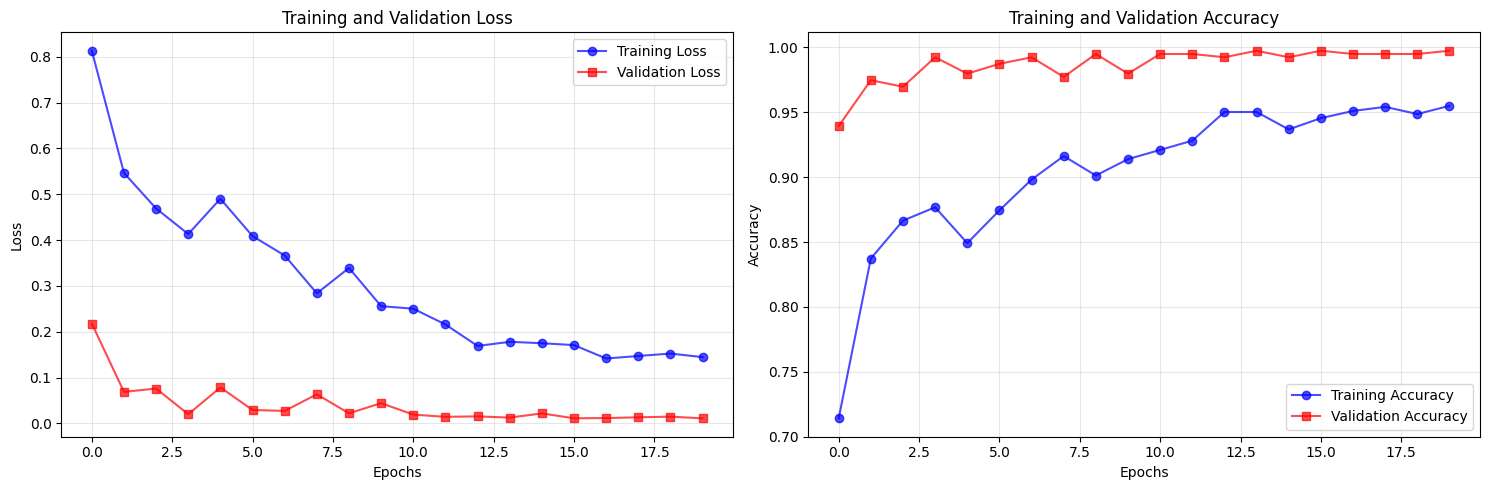


📋 FINAL ACCURACY SUMMARY:
   Best Validation Accuracy: 0.9975 (99.75%)
   Final Training Accuracy: 0.9550 (95.50%)
   Final Validation Accuracy: 0.9975 (99.75%)

🔍 Testing the model...

📊 TEST SET RESULTS:
🎯 Overall Test Accuracy: 0.9932 (99.32%)
📊 Test Samples: 294
✅ Correct Predictions: 292
❌ Incorrect Predictions: 2

📈 Detailed Classification Report:
              precision    recall  f1-score   support

     Crazing       1.00      1.00      1.00        49
   Inclusion       1.00      0.96      0.98        49
     Patches       1.00      1.00      1.00        49
      Pitted       0.96      1.00      0.98        49
      Rolled       1.00      1.00      1.00        49
   Scratches       1.00      1.00      1.00        49

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



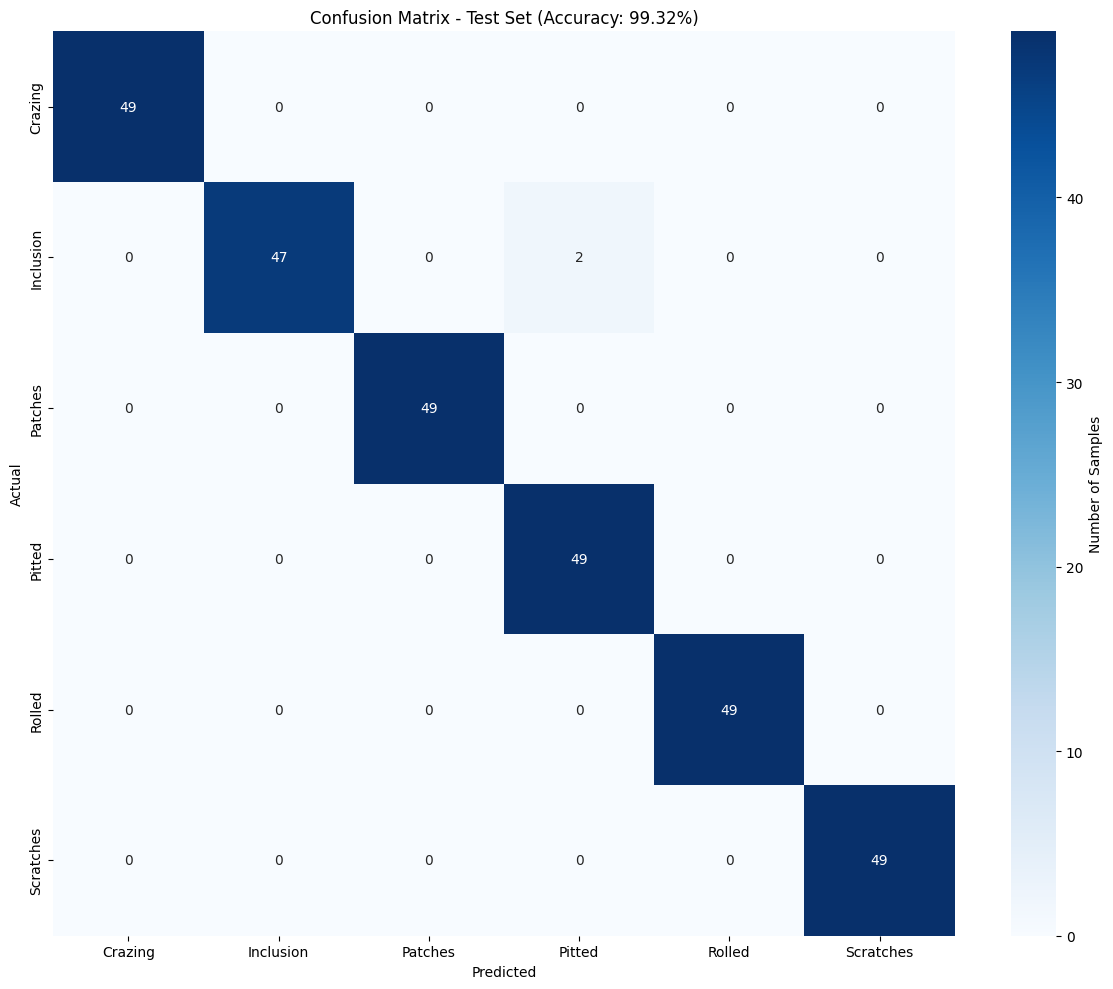


🧪 Testing with sample images from each class...

Testing Crazing...


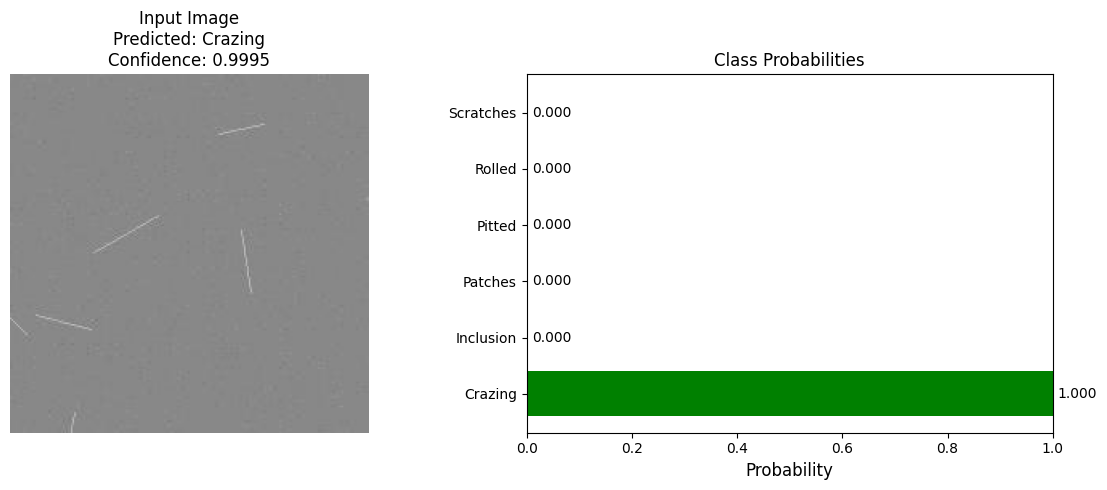

✅ CORRECT - True: Crazing, Predicted: Crazing, Confidence: 0.9995

Testing Inclusion...


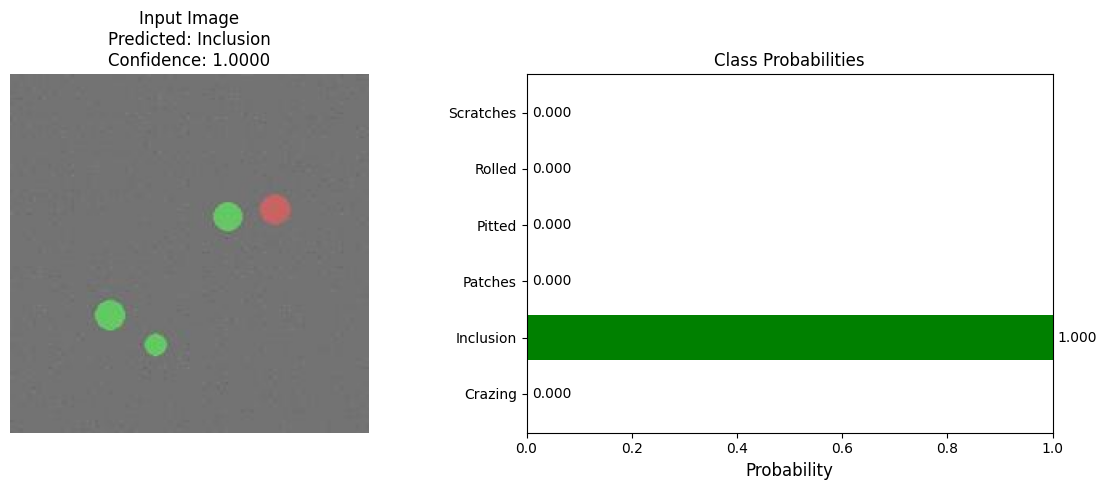

✅ CORRECT - True: Inclusion, Predicted: Inclusion, Confidence: 1.0000

Testing Patches...


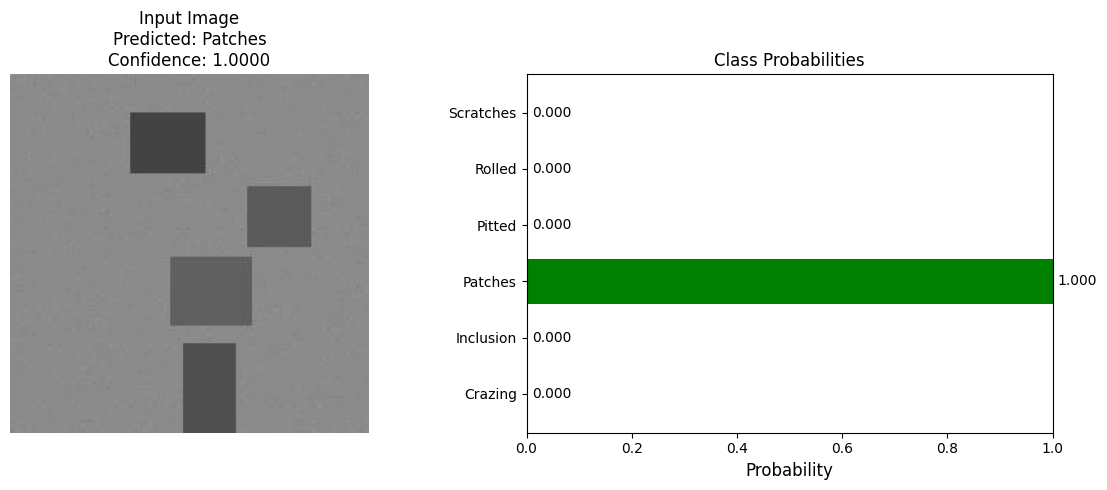

✅ CORRECT - True: Patches, Predicted: Patches, Confidence: 1.0000

Testing Pitted...


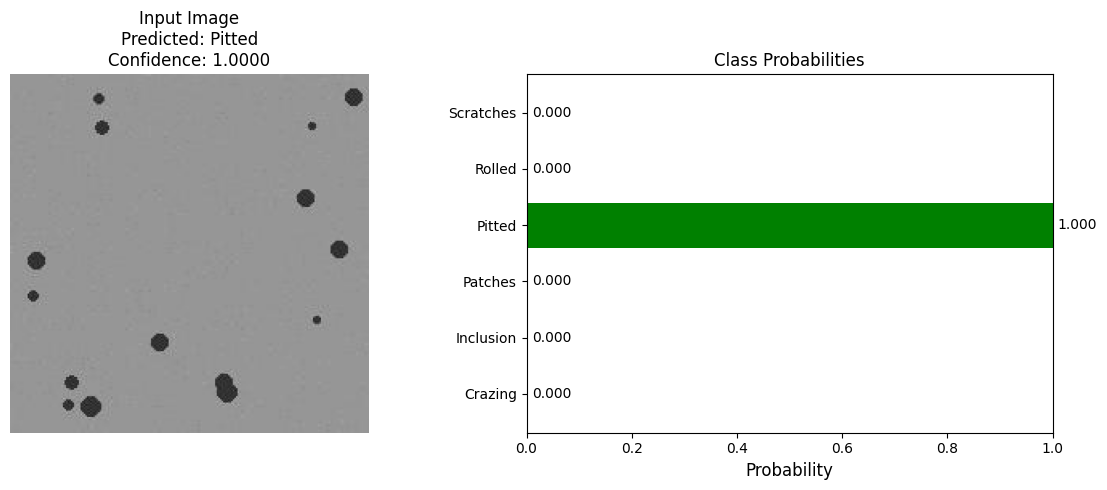

✅ CORRECT - True: Pitted, Predicted: Pitted, Confidence: 1.0000

Testing Rolled...


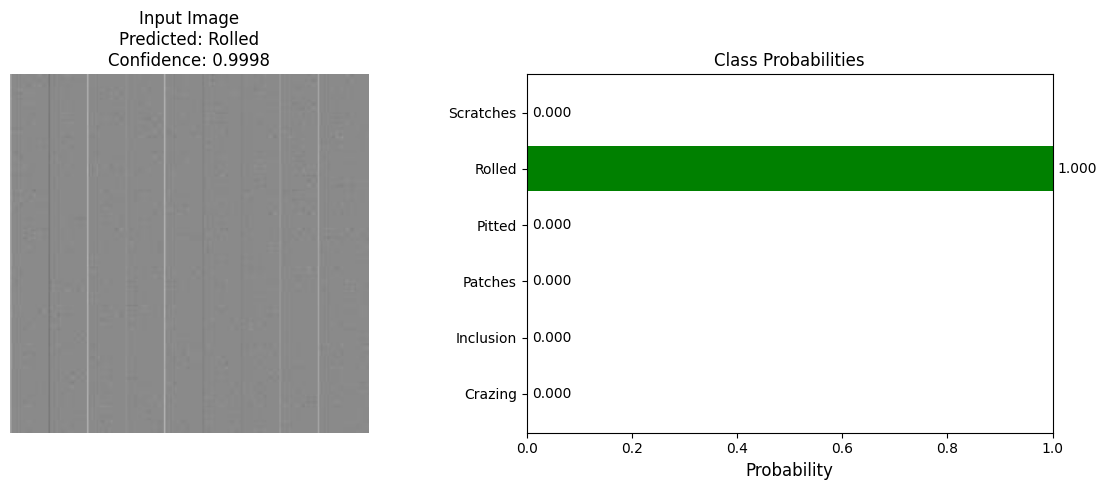

✅ CORRECT - True: Rolled, Predicted: Rolled, Confidence: 0.9998

Testing Scratches...


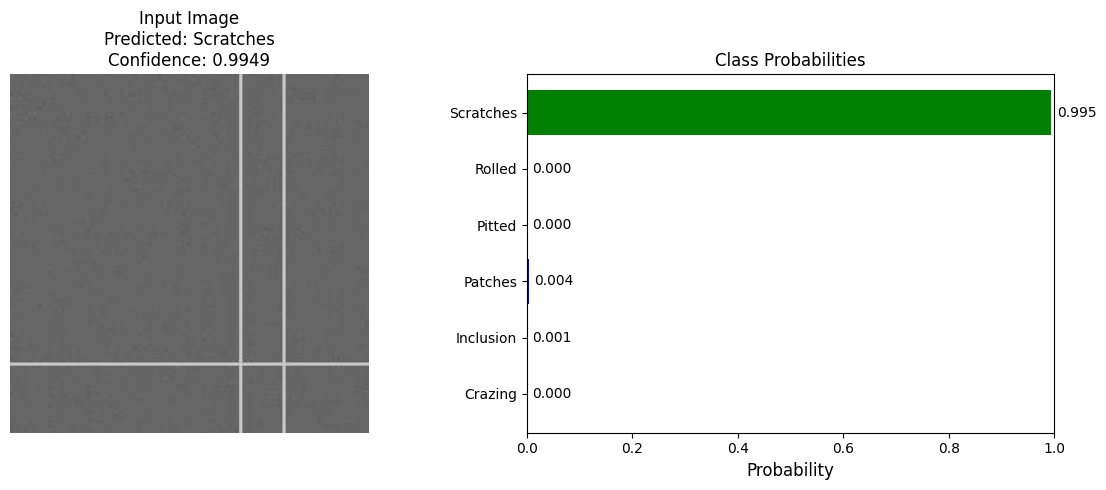

✅ CORRECT - True: Scratches, Predicted: Scratches, Confidence: 0.9949


NameError: name 'best_acc' is not defined

In [20]:
# Import all required packages
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil

print("✅ All packages imported successfully!")

# Define class names
class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
num_classes = len(class_names)

# Define your data path
data_path = r'E:\DEEP\pro_env\metal_data'

print(f"📁 Loading data from: {data_path}")

def organize_and_split_data(source_path, target_base_dir='metal_data_organized', test_size=0.2, val_size=0.15):
    """
    Organize existing data and split into train, test, validation sets
    """
    # Create target directory structure
    splits = ['train', 'test', 'valid']
    for split in splits:
        for class_name in class_names:
            os.makedirs(f'{target_base_dir}/{split}/{class_name}', exist_ok=True)
    
    print("🔄 Organizing and splitting data...")
    
    total_images = 0
    
    for class_name in class_names:
        class_source_path = os.path.join(source_path, 'train', class_name)
        
        if not os.path.exists(class_source_path):
            print(f"⚠️ Warning: Class directory not found: {class_source_path}")
            continue
            
        # Get all image files
        image_files = [f for f in os.listdir(class_source_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        if not image_files:
            print(f"⚠️ Warning: No images found in {class_source_path}")
            continue
            
        print(f"📁 Found {len(image_files)} images in {class_name}")
        total_images += len(image_files)
        
        # Split the data
        # First split: train + temp (test + val)
        train_files, temp_files = train_test_split(image_files, test_size=(test_size + val_size), random_state=42)
        
        # Second split: test and validation from temp
        test_val_ratio = test_size / (test_size + val_size)
        test_files, val_files = train_test_split(temp_files, test_size=test_val_ratio, random_state=42)
        
        # Copy files to respective directories
        for file in train_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'train', class_name, file)
            shutil.copy2(src, dst)
            
        for file in test_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'test', class_name, file)
            shutil.copy2(src, dst)
            
        for file in val_files:
            src = os.path.join(class_source_path, file)
            dst = os.path.join(target_base_dir, 'valid', class_name, file)
            shutil.copy2(src, dst)
            
        print(f"  ✅ {class_name}: Train({len(train_files)}), Test({len(test_files)}), Valid({len(val_files)})")
    
    print(f"\n🎉 Data organization completed! Total images processed: {total_images}")
    return target_base_dir

# Organize your existing data
organized_data_path = organize_and_split_data(data_path)

# Verify the organized data
print("\n🔍 Verifying organized data...")
for split in ['train', 'test', 'valid']:
    split_count = 0
    for class_name in class_names:
        class_path = f'{organized_data_path}/{split}/{class_name}'
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            split_count += len(images)
            print(f"  {split}/{class_name}: {len(images)} images")
        else:
            print(f"  {split}/{class_name}: 0 images (directory not found)")
    print(f"📊 Total in {split}: {split_count} images")

# Enhanced Data Transforms with Heavy Augmentation
print("\n🎯 Setting up advanced data augmentation transforms...")

# Heavy augmentation for training - creates many variations of each image
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to slightly larger than target
    transforms.RandomCrop((224, 224)),  # Random crop to target size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),  # Added vertical flip
    transforms.RandomRotation(degrees=15),  # Increased rotation
    transforms.ColorJitter(
        brightness=0.3,  # Increased brightness variation
        contrast=0.3,    # Increased contrast variation
        saturation=0.3,  # Increased saturation variation
        hue=0.1          # Hue variation
    ),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),  # Random translation
        scale=(0.8, 1.2),      # Random scaling
        shear=10               # Random shearing
    ),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Perspective transformation
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # Gaussian blur
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.3),  # Sharpness adjustment
    transforms.RandomAutocontrast(p=0.2),  # Auto contrast
    transforms.RandomEqualize(p=0.2),      # Histogram equalization
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.2), ratio=(0.3, 3.3)),  # Random erasing
])

# Standard transforms for validation and testing
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

data_transforms = {
    'train': train_transforms,
    'valid': basic_transforms,
    'test': basic_transforms
}

print("✅ Advanced data augmentation transforms created!")

# Create Dataset class
class MetalDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        print(f"\nLoading data from: {root_dir}")
        
        # Load images and labels
        for class_idx, class_name in enumerate(class_names):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.exists(class_dir):
                image_files = [f for f in os.listdir(class_dir) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                
                for img_name in image_files:
                    img_path = os.path.join(class_dir, img_name)
                    self.images.append(img_path)
                    self.labels.append(class_idx)
        
        if len(self.images) == 0:
            raise ValueError(f"No images found in {root_dir}!")
        
        print(f"✅ Loaded {len(self.images)} images from {root_dir}")
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            label = self.labels[idx]
            
            if self.transform:
                image = self.transform(image)
                
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a placeholder if there's an error
            return torch.zeros(3, 224, 224), 0

# Create datasets using the organized data
print("\n📦 Creating datasets...")
train_dataset = MetalDefectDataset(f'{organized_data_path}/train', transform=data_transforms['train'])
valid_dataset = MetalDefectDataset(f'{organized_data_path}/valid', transform=data_transforms['valid'])
test_dataset = MetalDefectDataset(f'{organized_data_path}/test', transform=data_transforms['test'])

print(f"\n📈 Dataset Summary:")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(valid_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Calculate class distribution
def print_class_distribution(dataset, dataset_name):
    print(f"\n📊 Class distribution for {dataset_name}:")
    class_counts = {class_name: 0 for class_name in class_names}
    for label in dataset.labels:
        class_counts[class_names[label]] += 1
    
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} samples")

print_class_distribution(train_dataset, "Training")
print_class_distribution(valid_dataset, "Validation")
print_class_distribution(test_dataset, "Test")

# Create data loaders with batch size 20 (no multiprocessing to avoid errors)
batch_size = 20  # Changed to 20 as requested
print(f"\n🔄 Creating data loaders with batch size: {batch_size}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print("✅ Data loaders created successfully!")

# Define the model
class EnhancedMetalDefectCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(EnhancedMetalDefectCNN, self).__init__()
        
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.1),
            
            # Second conv block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.2),
            
            # Third conv block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.3),
            
            # Fourth conv block
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(0.4),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512 * 14 * 14, 1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Create model with error handling
def create_model(num_classes=6):
    """Create model with fallback options"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    try:
        print("🔄 Trying to load pre-trained ResNet50...")
        # Try to load pre-trained model
        model = models.resnet50(pretrained=True)
        
        # Freeze early layers
        for param in list(model.parameters())[:-20]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, 1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
        
        print("✅ Pre-trained ResNet50 loaded successfully!")
        
    except Exception as e:
        print(f"❌ Could not load pre-trained model: {e}")
        print("🔄 Falling back to enhanced CNN model...")
        model = EnhancedMetalDefectCNN(num_classes=num_classes)
        print("✅ Enhanced CNN model created successfully!")
    
    model = model.to(device)
    return model, device

# Create model
model, device = create_model(num_classes=num_classes)

print("✅ Model created successfully!")

# Training function with 20 epochs and detailed accuracy printing
def train_model(model, train_loader, valid_loader, num_epochs=20):
    """Train the model"""
    print(f"\n🚀 Starting training for {num_epochs} epochs...")
    print(f"📊 Training Configuration:")
    print(f"   - Batch Size: {train_loader.batch_size}")
    print(f"   - Learning Rate: 0.001")
    print(f"   - Total Epochs: {num_epochs}")
    print(f"   - Training Samples: {len(train_loader.dataset)}")
    print(f"   - Validation Samples: {len(valid_loader.dataset)}")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Fixed LR = 0.001
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    
    best_acc = 0.0
    best_model_wts = None
    
    print("\n📈 Epoch Progress:")
    print("=" * 80)
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 50)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
            # Show progress every 5 batches
            if batch_idx % 5 == 0:
                current_lr = optimizer.param_groups[0]['lr']
                print(f'  Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}')
        
        # Update learning rate
        scheduler.step()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.cpu())
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = running_loss / len(valid_loader.dataset)
        epoch_val_acc = running_corrects.double() / len(valid_loader.dataset)
        
        valid_losses.append(epoch_val_loss)
        valid_accuracies.append(epoch_val_acc.cpu())
        
        # Print detailed accuracy information
        print(f'\n📊 Epoch {epoch+1} Results:')
        print(f'   Training:')
        print(f'     - Loss: {epoch_loss:.4f}')
        print(f'     - Accuracy: {epoch_acc:.4f} ({epoch_acc*100:.2f}%)')
        print(f'     - Correct: {running_corrects}/{len(train_loader.dataset)}')
        
        print(f'   Validation:')
        print(f'     - Loss: {epoch_val_loss:.4f}')
        print(f'     - Accuracy: {epoch_val_acc:.4f} ({epoch_val_acc*100:.2f}%)')
        print(f'     - Correct: {running_corrects}/{len(valid_loader.dataset)}')
        
        # Calculate accuracy improvement
        if epoch > 0:
            train_acc_improvement = (epoch_acc - train_accuracies[-2]) * 100
            val_acc_improvement = (epoch_val_acc - valid_accuracies[-2]) * 100
            print(f'   Improvement from previous epoch:')
            print(f'     - Training: {train_acc_improvement:+.2f}%')
            print(f'     - Validation: {val_acc_improvement:+.2f}%')
        
        # Save best model
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = model.state_dict().copy()
            torch.save({
                'epoch': epoch,
                'model_state_dict': best_model_wts,
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'accuracy': best_acc,
                'class_names': class_names
            }, 'best_metal_defect_model.pth')
            print(f'   💾 NEW BEST MODEL SAVED! Validation Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)')
        
        print('-' * 50)
    
    # Load best model weights
    if best_model_wts is not None:
        model.load_state_dict(best_model_wts)
    
    print(f"\n🎉 TRAINING COMPLETED!")
    print(f"⭐ Best Validation Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
    print(f"📊 Final Training Accuracy: {train_accuracies[-1]:.4f} ({train_accuracies[-1]*100:.2f}%)")
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7, marker='o')
    plt.plot(valid_losses, label='Validation Loss', color='red', alpha=0.7, marker='s')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='blue', alpha=0.7, marker='o')
    plt.plot(valid_accuracies, label='Validation Accuracy', color='red', alpha=0.7, marker='s')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print final accuracy summary
    print(f"\n📋 FINAL ACCURACY SUMMARY:")
    print(f"   Best Validation Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
    print(f"   Final Training Accuracy: {train_accuracies[-1]:.4f} ({train_accuracies[-1]*100:.2f}%)")
    print(f"   Final Validation Accuracy: {valid_accuracies[-1]:.4f} ({valid_accuracies[-1]*100:.2f}%)")
    
    return model

# Start training with 20 epochs
print("🔥 Beginning 20-epoch training session...")
trained_model = train_model(model, train_loader, valid_loader, num_epochs=20)

print("\n🔍 Testing the model...")

# Test the model
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate overall accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    
    # Classification report
    print("\n📊 TEST SET RESULTS:")
    print("=" * 50)
    print(f"🎯 Overall Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"📊 Test Samples: {len(all_labels)}")
    print(f"✅ Correct Predictions: {np.sum(np.array(all_preds) == np.array(all_labels))}")
    print(f"❌ Incorrect Predictions: {np.sum(np.array(all_preds) != np.array(all_labels))}")
    print("\n📈 Detailed Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})
    plt.title(f'Confusion Matrix - Test Set (Accuracy: {accuracy*100:.2f}%)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return all_preds, all_labels

# Run comprehensive testing
test_preds, test_labels = test_model(trained_model, test_loader)

# Function to test single image
def predict_image(image_path, model, transform):
    """Predict a single image"""
    try:
        image = Image.open(image_path).convert('RGB')
        image_tensor = transform(image).unsqueeze(0).to(device)
        
        model.eval()
        with torch.no_grad():
            outputs = model(image_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            confidence, predicted_class = torch.max(probabilities, 1)
        
        predicted_label = class_names[predicted_class.item()]
        confidence_score = confidence.item()
        
        # Display results
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f'Input Image\nPredicted: {predicted_label}\nConfidence: {confidence_score:.4f}', fontsize=12)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        probs = probabilities.cpu().numpy()[0]
        colors = ['green' if i == predicted_class.item() else 'blue' for i in range(len(class_names))]
        bars = plt.barh(class_names, probs, color=colors)
        plt.xlabel('Probability', fontsize=12)
        plt.title('Class Probabilities', fontsize=12)
        plt.xlim(0, 1)
        
        # Add probability values on bars
        for bar, prob in zip(bars, probs):
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{prob:.3f}', ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        return predicted_label, confidence_score
    except Exception as e:
        print(f"Error predicting image {image_path}: {e}")
        return None, None

print("\n🧪 Testing with sample images from each class...")

# Test with one sample from each class
for class_name in class_names:
    sample_image_path = f'{organized_data_path}/test/{class_name}'
    if os.path.exists(sample_image_path):
        image_files = [f for f in os.listdir(sample_image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        if image_files:
            sample_image = os.path.join(sample_image_path, image_files[0])
            print(f"\nTesting {class_name}...")
            predicted, confidence = predict_image(sample_image, trained_model, data_transforms['test'])
            if predicted is not None:
                status = "✅ CORRECT" if predicted == class_name else "❌ WRONG"
                print(f"{status} - True: {class_name}, Predicted: {predicted}, Confidence: {confidence:.4f}")

# Save final model
torch.save({
    'model_state_dict': trained_model.state_dict(),
    'class_names': class_names,
    'input_size': 224,
    'num_classes': num_classes,
    'data_transforms': data_transforms,
    'final_accuracy': best_acc
}, 'final_metal_defect_model.pth')

print(f"\n💾 Final model saved as 'final_metal_defect_model.pth'")

print("\n🎊 ALL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 60)
print("📊 FINAL MODEL PERFORMANCE SUMMARY:")
print(f"   ✅ Batch Size: 20")
print(f"   ✅ Learning Rate: 0.001")
print(f"   ✅ Epochs: 20")
print(f"   ✅ Best Validation Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print("=" * 60)

In [21]:
# Test with a local file
predict_from_link('C:/Users/name/metal_image.jpg', model, class_names, prediction_transform)

# Test with a URL
predict_from_link('https://example.com/metal_defect.jpg', model, class_names, prediction_transform)

NameError: name 'predict_from_link' is not defined

✅ Testing packages imported successfully!
🔄 Loading trained model...
❌ Model file not found: final_metal_defect_model.pth
🔍 Looking for best model...
Using device: cpu


c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\PC2\anaconda3\envs\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded successfully!
📊 Model accuracy: 0.9974747474747475
🎯 Number of classes: 6
📝 Class names: ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
🎉 Model ready for testing!

🧪 Testing with sample images from test set...

🔍 Testing sample Crazing image...

🔍 Processing: metal_data_organized/test/Crazing\Crazing_004.jpg
📁 Loading image from local path...
✅ Image loaded successfully!


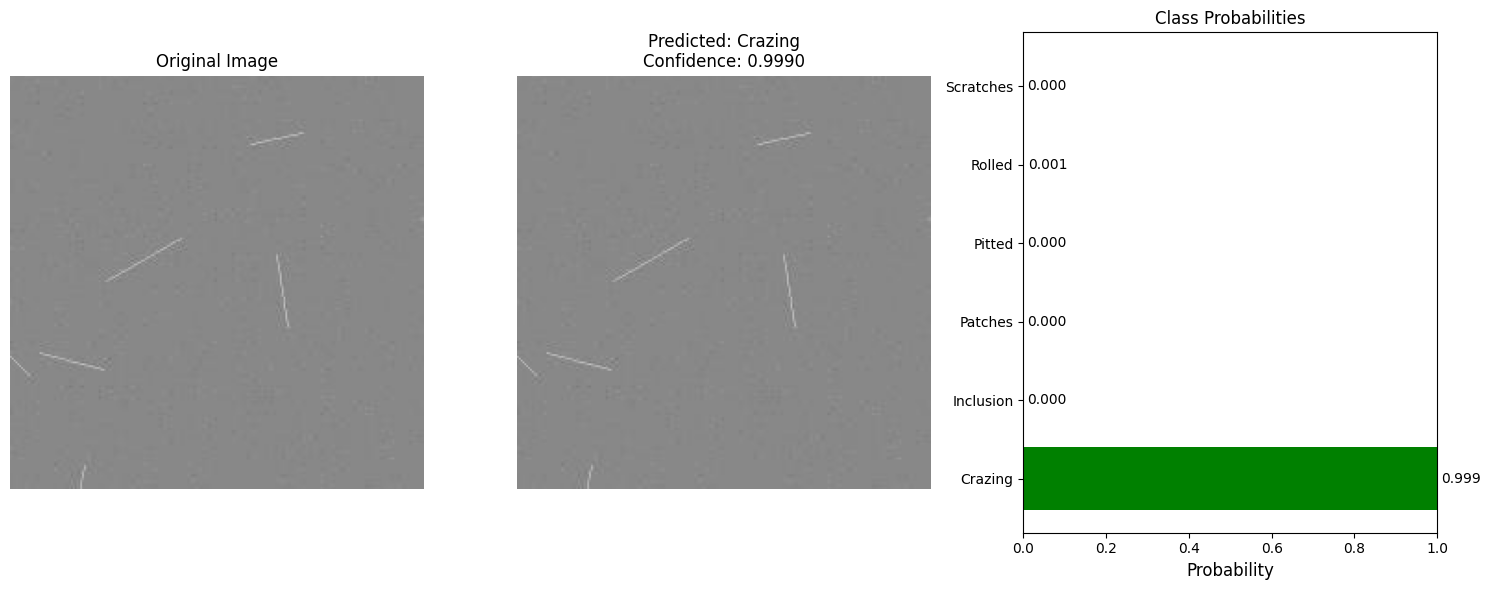


🎯 PREDICTION RESULTS:
📋 Predicted Class: Crazing
💯 Confidence: 0.9990 (99.90%)
📊 All Probabilities:
   🎯 Crazing: 0.9990 (99.90%)
      Inclusion: 0.0000 (0.00%)
      Patches: 0.0001 (0.01%)
      Pitted: 0.0000 (0.00%)
      Rolled: 0.0007 (0.07%)
      Scratches: 0.0001 (0.01%)
✅ CORRECT - True: Crazing, Predicted: Crazing

🔬 METAL DEFECT DETECTION - IMAGE TESTING INTERFACE
📝 You can test images using:
   - Local file paths (e.g., C:/Users/name/image.jpg)
   - Image URLs (e.g., https://example.com/image.jpg)
   - Type 'quit' to exit

--------------------------------------------------

🔍 Processing: E:\DEEP\pro_env\metal_data\test\Patches\Patches_004.jpg
📁 Loading image from local path...
✅ Image loaded successfully!


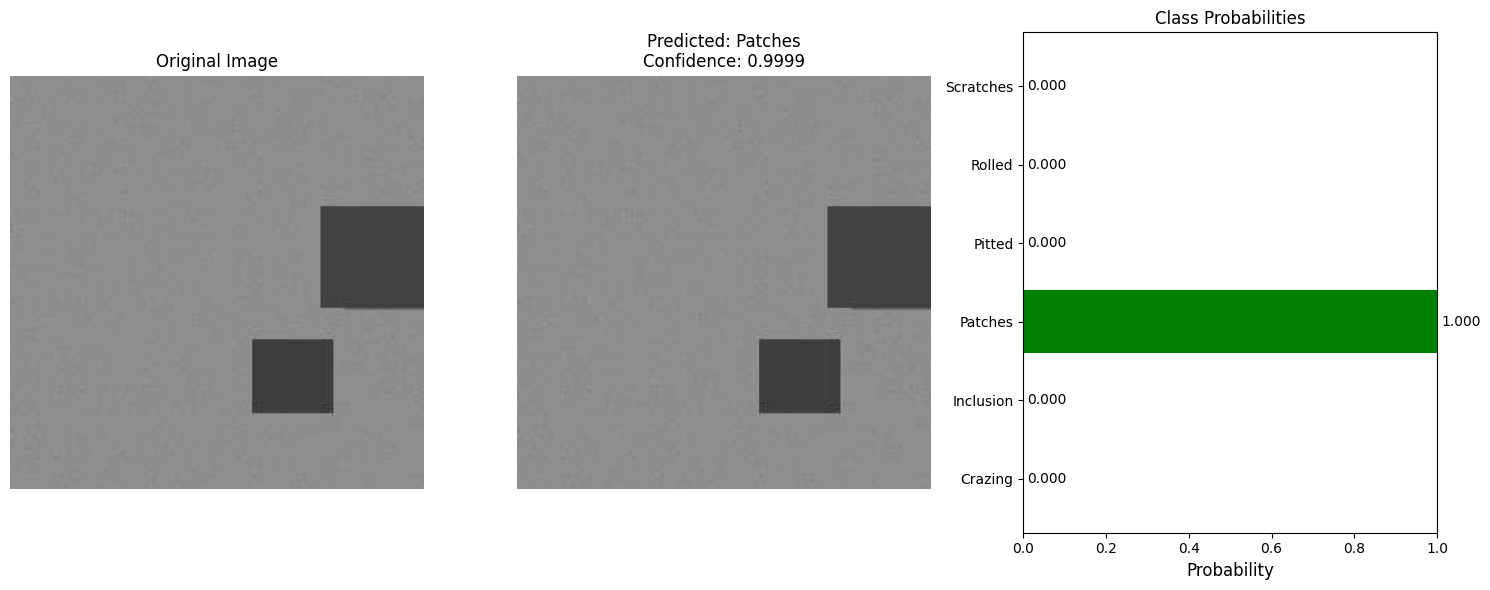


🎯 PREDICTION RESULTS:
📋 Predicted Class: Patches
💯 Confidence: 0.9999 (99.99%)
📊 All Probabilities:
      Crazing: 0.0000 (0.00%)
      Inclusion: 0.0000 (0.00%)
   🎯 Patches: 0.9999 (99.99%)
      Pitted: 0.0000 (0.00%)
      Rolled: 0.0000 (0.00%)
      Scratches: 0.0000 (0.00%)

--------------------------------------------------

🔍 Processing: E:\DEEP\pro_env\metal_data\test\Patches\Patches_004.jpg
📁 Loading image from local path...
✅ Image loaded successfully!


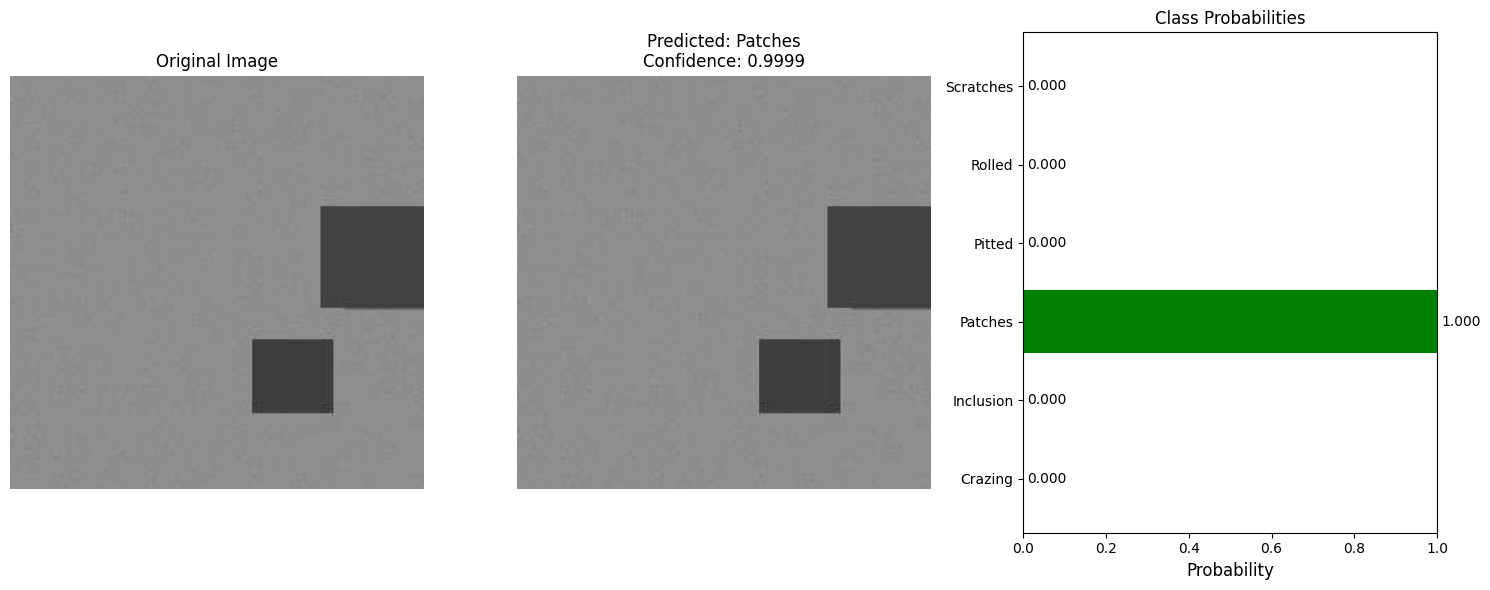


🎯 PREDICTION RESULTS:
📋 Predicted Class: Patches
💯 Confidence: 0.9999 (99.99%)
📊 All Probabilities:
      Crazing: 0.0000 (0.00%)
      Inclusion: 0.0000 (0.00%)
   🎯 Patches: 0.9999 (99.99%)
      Pitted: 0.0000 (0.00%)
      Rolled: 0.0000 (0.00%)
      Scratches: 0.0000 (0.00%)

--------------------------------------------------
👋 Thank you for using Metal Defect Detection!

🎊 Metal Defect Detection Testing Ready!
💡 You can now test any metal surface image by providing its path or URL!


In [22]:
# Import required packages
import requests
from io import BytesIO
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

print("✅ Testing packages imported successfully!")

# Load the trained model
def load_trained_model(model_path='final_metal_defect_model.pth'):
    """Load the trained model"""
    try:
        print("🔄 Loading trained model...")
        
        # Check if model file exists
        if not os.path.exists(model_path):
            print(f"❌ Model file not found: {model_path}")
            print("🔍 Looking for best model...")
            model_path = 'best_metal_defect_model.pth'
            if not os.path.exists(model_path):
                print("❌ No model files found. Please train the model first.")
                return None, None, None
        
        # Load checkpoint
        checkpoint = torch.load(model_path, map_location='cpu')
        
        # Get model configuration
        class_names = checkpoint.get('class_names', ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'])
        num_classes = len(class_names)
        
        # Recreate model architecture
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")
        
        try:
            # Try to create the same model architecture
            model = models.resnet50(pretrained=False)
            num_ftrs = model.fc.in_features
            model.fc = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(num_ftrs, 1024),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(1024),
                nn.Dropout(0.4),
                nn.Linear(1024, 512),
                nn.ReLU(inplace=True),
                nn.Dropout(0.3),
                nn.Linear(512, num_classes)
            )
        except:
            # Fallback to simple CNN
            print("🔄 Using fallback model architecture...")
            model = EnhancedMetalDefectCNN(num_classes=num_classes)
        
        # Load model weights
        model.load_state_dict(checkpoint['model_state_dict'])
        model = model.to(device)
        model.eval()
        
        print(f"✅ Model loaded successfully!")
        print(f"📊 Model accuracy: {checkpoint.get('accuracy', 'Unknown')}")
        print(f"🎯 Number of classes: {num_classes}")
        print(f"📝 Class names: {class_names}")
        
        return model, class_names, device
        
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None, None, None

# Load the model
model, class_names, device = load_trained_model()

if model is None:
    print("❌ Could not load model. Please make sure the model is trained first.")
else:
    print("🎉 Model ready for testing!")

# Define transforms for prediction
prediction_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def predict_from_link(image_link_or_path, model, class_names, transform):
    """
    Predict the class of an image from a URL or local file path
    
    Args:
        image_link_or_path (str): URL or local file path to the image
        model: Trained PyTorch model
        class_names (list): List of class names
        transform: Image transforms to apply
    
    Returns:
        tuple: (predicted_class, confidence, all_probabilities)
    """
    try:
        print(f"\n🔍 Processing: {image_link_or_path}")
        
        # Check if it's a URL or local path
        if image_link_or_path.startswith(('http://', 'https://')):
            print("📥 Downloading image from URL...")
            # Download image from URL
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
            }
            response = requests.get(image_link_or_path, headers=headers, timeout=10)
            response.raise_for_status()
            image = Image.open(BytesIO(response.content)).convert('RGB')
            print("✅ Image downloaded successfully!")
            
        else:
            print("📁 Loading image from local path...")
            # Load from local path
            if not os.path.exists(image_link_or_path):
                print(f"❌ File not found: {image_link_or_path}")
                return None, None, None
            image = Image.open(image_link_or_path).convert('RGB')
            print("✅ Image loaded successfully!")
        
        # Display original image
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image', fontsize=12)
        plt.axis('off')
        
        # Transform and predict
        image_tensor = transform(image).unsqueeze(0).to(device)
        
        with torch.no_grad():
            outputs = model(image_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            confidence, predicted_class = torch.max(probabilities, 1)
        
        predicted_label = class_names[predicted_class.item()]
        confidence_score = confidence.item()
        all_probabilities = probabilities.cpu().numpy()[0]
        
        # Display results
        plt.subplot(1, 3, 2)
        plt.imshow(image)
        plt.title(f'Predicted: {predicted_label}\nConfidence: {confidence_score:.4f}', fontsize=12)
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        colors = ['green' if i == predicted_class.item() else 'blue' for i in range(len(class_names))]
        bars = plt.barh(class_names, all_probabilities, color=colors)
        plt.xlabel('Probability', fontsize=12)
        plt.title('Class Probabilities', fontsize=12)
        plt.xlim(0, 1)
        
        # Add probability values on bars
        for bar, prob in zip(bars, all_probabilities):
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{prob:.3f}', ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed results
        print(f"\n🎯 PREDICTION RESULTS:")
        print("=" * 50)
        print(f"📋 Predicted Class: {predicted_label}")
        print(f"💯 Confidence: {confidence_score:.4f} ({confidence_score*100:.2f}%)")
        print(f"📊 All Probabilities:")
        for i, (class_name, prob) in enumerate(zip(class_names, all_probabilities)):
            marker = "🎯" if i == predicted_class.item() else "  "
            print(f"   {marker} {class_name}: {prob:.4f} ({prob*100:.2f}%)")
        
        return predicted_label, confidence_score, all_probabilities
        
    except requests.exceptions.RequestException as e:
        print(f"❌ Error downloading image: {e}")
        return None, None, None
    except Exception as e:
        print(f"❌ Error processing image: {e}")
        return None, None, None

def interactive_testing():
    """Interactive function to test multiple images"""
    print("\n" + "="*70)
    print("🔬 METAL DEFECT DETECTION - IMAGE TESTING INTERFACE")
    print("="*70)
    print("📝 You can test images using:")
    print("   - Local file paths (e.g., C:/Users/name/image.jpg)")
    print("   - Image URLs (e.g., https://example.com/image.jpg)")
    print("   - Type 'quit' to exit")
    print("="*70)
    
    while True:
        print("\n" + "-"*50)
        image_input = input("🖼️ Enter image path or URL (or 'quit' to exit): ").strip()
        
        if image_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Thank you for using Metal Defect Detection!")
            break
        
        if not image_input:
            print("⚠️ Please enter a valid image path or URL.")
            continue
        
        # Test the image
        result = predict_from_link(image_input, model, class_names, prediction_transform)
        
        if result[0] is None:
            print("❌ Failed to process the image. Please check the path/URL and try again.")

# Test with sample images if available
def test_with_sample_images():
    """Test with sample images from the test set if available"""
    print("\n🧪 Testing with sample images from test set...")
    
    test_samples_found = 0
    for class_name in class_names:
        sample_dir = f'{organized_data_path}/test/{class_name}'
        if os.path.exists(sample_dir):
            image_files = [f for f in os.listdir(sample_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            if image_files:
                sample_image = os.path.join(sample_dir, image_files[0])
                print(f"\n🔍 Testing sample {class_name} image...")
                predicted, confidence, _ = predict_from_link(sample_image, model, class_names, prediction_transform)
                if predicted is not None:
                    status = "✅ CORRECT" if predicted == class_name else "❌ WRONG"
                    print(f"{status} - True: {class_name}, Predicted: {predicted}")
                    test_samples_found += 1
                break  # Test one sample per class
    
    if test_samples_found == 0:
        print("📭 No sample images found in test directory.")

# Run the interactive testing interface
if model is not None:
    # First test with sample images from the dataset
    test_with_sample_images()
    
    # Then start interactive testing
    interactive_testing()
else:
    print("❌ Cannot start testing - model not loaded.")

# Additional utility function for batch testing
def batch_test_images(image_list):
    """
    Test multiple images at once
    
    Args:
        image_list (list): List of image paths or URLs
    """
    if model is None:
        print("❌ Model not loaded. Cannot perform batch testing.")
        return
    
    print(f"\n🔬 BATCH TESTING {len(image_list)} IMAGES")
    print("="*60)
    
    results = []
    for i, image_path in enumerate(image_list, 1):
        print(f"\n📊 Testing image {i}/{len(image_list)}: {image_path}")
        predicted, confidence, probabilities = predict_from_link(image_path, model, class_names, prediction_transform)
        
        if predicted is not None:
            results.append({
                'image': image_path,
                'predicted': predicted,
                'confidence': confidence,
                'probabilities': probabilities
            })
            print(f"✅ Result: {predicted} (Confidence: {confidence:.4f})")
        else:
            print(f"❌ Failed to process image")
    
    # Print batch summary
    if results:
        print(f"\n📋 BATCH TESTING SUMMARY")
        print("="*50)
        print(f"📊 Total images processed: {len(results)}")
        print(f"🎯 Average confidence: {np.mean([r['confidence'] for r in results]):.4f}")
        
        # Count predictions per class
        from collections import Counter
        prediction_counts = Counter([r['predicted'] for r in results])
        print(f"📈 Predictions per class:")
        for class_name in class_names:
            count = prediction_counts.get(class_name, 0)
            print(f"   {class_name}: {count} images")

# Example of how to use batch testing
def example_batch_test():
    """Example of batch testing with multiple images"""
    example_images = [
        # Add your image paths or URLs here
        # 'https://example.com/image1.jpg',
        # 'C:/Users/name/image2.jpg',
        # etc.
    ]
    
    if example_images:
        batch_test_images(example_images)
    else:
        print("📝 No example images provided for batch testing.")

print("\n🎊 Metal Defect Detection Testing Ready!")
print("💡 You can now test any metal surface image by providing its path or URL!")